In [1]:
# This is the import cell
import sys
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.ticker as ticker
first = True
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 10)

# Here are my rc parameters for matplotlib
mpl.rc('font', serif='Helvetica Neue') 
mpl.rcParams.update({'font.size': 9})
mpl.rcParams['figure.figsize'] = 3.2, 2.8
mpl.rcParams['figure.dpi'] = 2000
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 0.5
mpl.rcParams['axes.linewidth'] = 1.5

In [2]:
# Get the current path
if first:
    parent = os.getcwd()
os.chdir(parent)

# Grab file names from data folder
dens = os.listdir('densities')
try:
    data.remove('.DS_Store')
except:
    print(".DS_Store not in directory")

# Grab the MCS data
pres = os.listdir('pressures')
try:
    pres.remove('.DS_Store')
except:
    print(".DS_Store not in directory")

.DS_Store not in directory
.DS_Store not in directory


In [3]:
# Some functions to get the relevant data from the filenames
def checkFile(fname, string):
    for i in xrange(len(fname)):
        if fname[i] == string[0]:
#             print"{} matches {}".format(fname[i], string[0])
            for j in xrange(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
#                     print"{} matches {}".format(fname[i+j], string[j])
                    if j == (len(string) - 1):
#                         print"Final match!"
                        return True
                else:
                    break
    return False
    
def txtValue(fname, string):
    out = ""
    index = 0
    for i in xrange(len(fname)):
        if fname[i] == string[0]:
            for j in xrange(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
                    if j == (len(string) - 1):
                        # Last index of search string
                        index = i + j
                else:
                    break
                        
    # First index of value
    index += 1
    mybool = True
    while mybool:
        if fname[index].isdigit():
            out = out + fname[index]
            index += 1
        elif fname[index] == ".":    
            if fname[index+1].isdigit():
                out = out + fname[index]
                index += 1
            else:
                mybool = False
        else:
            mybool = False
    return float(out)

# Sorting functions
def multiSort(arr1, arr2, arr3, arr4):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for PeR, PeS, xS in this case
    cpy1 = np.copy(arr1)
    cpy2 = np.copy(arr2)
    cpy3 = np.copy(arr3)
    cpy4 = np.copy(arr4)
    ind = np.arange(0, len(arr1))
    for i in xrange(len(cpy1)):
        for j in xrange(len(cpy1)):
            # Sort by first variable
            if cpy1[i] > cpy1[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            # If first variable is equal, resort to second variable
            elif cpy1[i] == cpy1[j] and cpy2[i] > cpy2[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] > cpy3[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] == cpy3[j] and cpy4[i] > cpy4[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in xrange(len(arr1)):
        arr1[i] = cpy[arr2[i]]

In [4]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "ep", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in dens:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 
                
# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
    print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("ep")],
                       storeVals[chkStrings.index("cluster")])
    indSort(dens, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_dens = []
os.chdir(parent)
os.chdir('densities')
for i in dens:
    print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_dens.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_dens[0])

Sorting... 
cluster_phase_density_pa50.0_pb0.0_xa100.0_phi45_ep0.000.txt
cluster_phase_density_pa50.0_pb0.0_xa100.0_phi45_ep0.001.txt
cluster_phase_density_pa50.0_pb0.0_xa100.0_phi45_ep0.010.txt
cluster_phase_density_pa50.0_pb0.0_xa100.0_phi45_ep0.100.txt
cluster_phase_density_pa50.0_pb0.0_xa100.0_phi45_ep1.000.txt
cluster_phase_density_pa50.0_pb0.0_xa100.0_phi55_ep0.000.txt
cluster_phase_density_pa50.0_pb0.0_xa100.0_phi55_ep0.001.txt
cluster_phase_density_pa50.0_pb0.0_xa100.0_phi55_ep0.010.txt
cluster_phase_density_pa50.0_pb0.0_xa100.0_phi55_ep1.000.txt
cluster_phase_density_pa50.0_pb0.0_xa100.0_phi65_ep0.000.txt
cluster_phase_density_pa50.0_pb0.0_xa100.0_phi65_ep0.001.txt
cluster_phase_density_pa50.0_pb0.0_xa100.0_phi65_ep0.010.txt
cluster_phase_density_pa50.0_pb0.0_xa100.0_phi65_ep0.100.txt
cluster_phase_density_pa50.0_pb0.0_xa100.0_phi65_ep1.000.txt
cluster_phase_density_pa100.0_pb0.0_xa100.0_phi45_ep0.000.txt
cluster_phase_density_pa100.0_pb0.0_xa100.0_phi45_ep0.001.txt
cluster_ph

,Timestep,Gas-r=1.0,Liq-r=1.0,Gas-r=1.5,Liq-r=1.5,Gas-r=2.0,Liq-r=2.0,Gas-r=2.5,Liq-r=2.5,Gas-r=3.0,Liq-r=3.0,Gas-r=3.5,Liq-r=3.5,Gas-r=4.0,Liq-r=4.0,Gas-r=4.5,Liq-r=4.5,Gas-r=5.0,Liq-r=5.0
0,10.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.420,0.455
1,20.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.405,0.455
2,30.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.43,0.455,0.420,0.455
3,40.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.405,0.455
4,50.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.420,0.455
5,60.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.405,0.455
6,70.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.405,0.455
7,80.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.405,0.455
8,90.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.430,0.455
9,100.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.405,0.455


In [5]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "ep", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
    print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("ep")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres = []
os.chdir(parent)
os.chdir('pressures')
for i in pres:
    print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres[-1])

Sorting... 
cluster_pressure_pa50.0_pb0.0_xa100.0_phi45_ep0.000.txt
cluster_pressure_pa50.0_pb0.0_xa100.0_phi45_ep0.001.txt
cluster_pressure_pa50.0_pb0.0_xa100.0_phi45_ep0.010.txt
cluster_pressure_pa50.0_pb0.0_xa100.0_phi45_ep0.100.txt
cluster_pressure_pa50.0_pb0.0_xa100.0_phi45_ep1.000.txt
cluster_pressure_pa50.0_pb0.0_xa100.0_phi55_ep0.000.txt
cluster_pressure_pa50.0_pb0.0_xa100.0_phi55_ep0.001.txt
cluster_pressure_pa50.0_pb0.0_xa100.0_phi55_ep0.010.txt
cluster_pressure_pa50.0_pb0.0_xa100.0_phi55_ep1.000.txt
cluster_pressure_pa50.0_pb0.0_xa100.0_phi65_ep0.000.txt
cluster_pressure_pa50.0_pb0.0_xa100.0_phi65_ep0.001.txt
cluster_pressure_pa50.0_pb0.0_xa100.0_phi65_ep0.010.txt
cluster_pressure_pa50.0_pb0.0_xa100.0_phi65_ep0.100.txt
cluster_pressure_pa50.0_pb0.0_xa100.0_phi65_ep1.000.txt
cluster_pressure_pa100.0_pb0.0_xa100.0_phi45_ep0.000.txt
cluster_pressure_pa100.0_pb0.0_xa100.0_phi45_ep0.001.txt
cluster_pressure_pa100.0_pb0.0_xa100.0_phi45_ep0.010.txt
cluster_pressure_pa100.0_pb0.0_xa

,Timestep,gasArea,gasTrace,gasPress,bulkArea,bulkTrace,bulkPress,SurfaceTense,Length
0,100.0,89356.567,432932.609,4.845,28214.2,2.821958e+08,10001.906,7568634.413,757.1


In [6]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params = pd.DataFrame(columns=headers)
for i in range(0, len(all_dens)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("ep")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params = params.append(df, ignore_index = True)
display(params)

,pe,peA,peB,xA,eps,phi,tauPer_dt
0,0,50,0,100.0,0.0001,45.0,0.000001
1,0,50,0,100.0,0.0010,45.0,0.000001
2,0,50,0,100.0,0.0100,45.0,0.000001
3,0,50,0,100.0,0.1000,45.0,0.000001
4,0,50,0,100.0,1.0000,45.0,0.000001
...,...,...,...,...,...,...,...
126,0,500,0,100.0,0.0100,55.0,0.000001
127,0,500,0,100.0,1.0000,55.0,0.000001
128,0,500,0,100.0,0.0001,65.0,0.000001
129,0,500,0,100.0,0.0100,65.0,0.000001


In [7]:
# Let's add columns to the time-resolved simulation data
for i in xrange(len(all_dens)):
    # Ger rid of NaN in favor of 0
    all_dens[i].fillna(0, inplace=True)

headers=list(all_dens[0])
display(all_dens[0])
print(all_dens[0][headers[1]][0])
print(all_dens[0][headers[2]][0])

,Timestep,Gas-r=1.0,Liq-r=1.0,Gas-r=1.5,Liq-r=1.5,Gas-r=2.0,Liq-r=2.0,Gas-r=2.5,Liq-r=2.5,Gas-r=3.0,Liq-r=3.0,Gas-r=3.5,Liq-r=3.5,Gas-r=4.0,Liq-r=4.0,Gas-r=4.5,Liq-r=4.5,Gas-r=5.0,Liq-r=5.0
0,10.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.420,0.455
1,20.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.405,0.455
2,30.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.43,0.455,0.420,0.455
3,40.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.405,0.455
4,50.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.420,0.455
5,60.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.405,0.455
6,70.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.405,0.455
7,80.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.405,0.455
8,90.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.430,0.455
9,100.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.405,0.455


0.25
0.5


Totals
[65.0, 55.0, 45.0]
[1.0, 0.1, 0.01, 0.001, 0.0001]


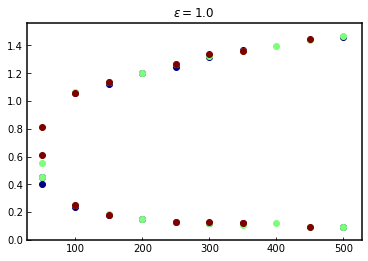

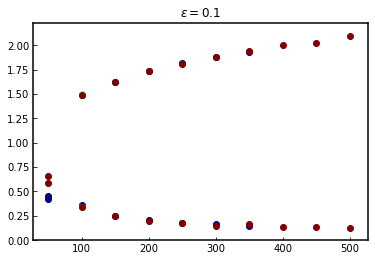

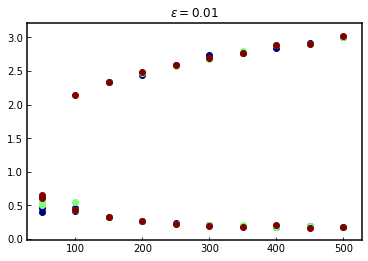

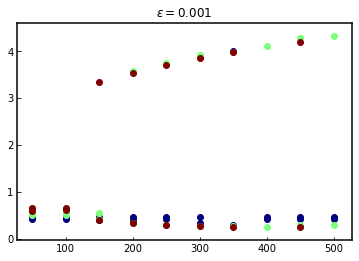

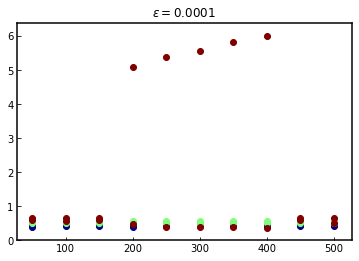

In [8]:
# Let's try and plot phiG and phiC vs peNet
print("Totals")
gas = "Gas-r=5.0"
liq = "Liq-r=5.0"

distEps = []
distPhi = []
for i in range(0, len(params)):
    if params['eps'][i] not in distEps:
        distEps.append(params['eps'][i])
    if params['phi'][i] not in distPhi:
        distPhi.append(params['phi'][i])
distPhi.sort(reverse=True)
distEps.sort(reverse=True)

print(distPhi)
print(distEps)

cols = []
cnt = 0.
for i in range(0, len(distEps)):
    cols.append(plt.cm.jet(cnt))
    cnt += (1./(len(distEps)-1))
        
for j in distEps:
    for i in range(0, len(all_dens)):
        if params['eps'][i] == j:
            plt.scatter(params['peA'][i], all_dens[i][gas].iloc[-1], c=plt.cm.jet((params['phi'][i]-45)/20.))
            plt.scatter(params['peA'][i], all_dens[i][liq].iloc[-1], c=plt.cm.jet((params['phi'][i]-45)/20.))
    plt.title(r"$\epsilon=$" + str(j))
    plt.show()

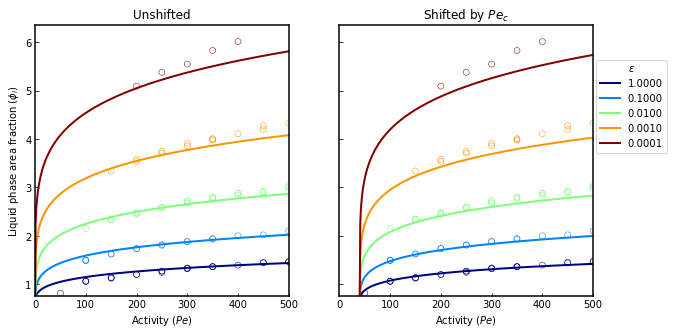

In [9]:
# Lennard-Jones force
def ljForce(r, eps, sigma=1.):
    div = (sigma/r)
    dU = (24. * eps / r) * ((2*(div**12)) - (div)**6)
    return dU

def avgCollisionForce(pe, power=1.):
    '''Computed from the integral of possible angles'''
    # We obtain this by vectorizing the collision force
    # and taking the magnitude of the resultant vector
    magnitude = np.sqrt(28.)
    # These answeres differ by a factor of 4/3
#     return (magnitude * 4. * (pe**power)) / (np.pi * np.pi)
    # This was Ehssan's solution
    return (magnitude * (pe**power)) / (np.pi)
    # This is w/ 3-body collisions as a summation
#     return magnitude * (pe**power) * 0.52

# From area fraction, get lattice spacing
def phiToLat(phiIn):
    '''Read in phi, output the lattice spacing'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    latCP = 1.
    return np.sqrt(phiCP / phiIn)

# From lattice spacing, get area fraction
def latToPhi(latIn):
    '''Read in lattice spacing, output phi'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    latCP = 1.
    return phiCP / (latIn**2)

# Let's do this at constant epsilon
def convergeConstEps(pe, eps):
    out = []
    for i in pe:
        r = 1.112
        r = 1.5
        skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
        for j in skip:
            while ljForce(r, eps) < avgCollisionForce(i):
                r -= j
            r += j
        out.append(latToPhi(r))
    return out

# Let's see how the data fits onto the predicted LJ curve
epsRange = np.arange(0.1, 1.1, 0.9)
epsRange = [1., 0.1, 0.01, 0.001, 0.0001]
peRange = np.arange(0., 600., 1.)

# Get phi vs pe at constant epsilon
shift = 0.
shift = 40.
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(10, 5))
for i in epsRange:
    ax[0].plot(peRange, convergeConstEps(peRange, i),
               c=cols[distEps.index(i)], label="{0:.4f}".format(i), lw=2.0)
    ax[1].plot(peRange+shift, convergeConstEps(peRange, i),
               c=cols[distEps.index(i)], label="{0:.4f}".format(i), lw=2.0)
ax[1].legend(title=r'$\epsilon$', loc='center', bbox_to_anchor=(1.15, 0.7))
ax[0].set_xlabel(r'Activity $(Pe)$')
ax[1].set_xlabel(r'Activity $(Pe)$')
ax[0].set_ylabel(r'Liquid phase area fraction $(\phi_{l})$')

# Overlay data on top of this
GAS="Gas-r=5.0"
LIQ="Liq-r=5.0"
for i in range(0, len(epsRange)):
    for j in range(0, len(all_dens)):
        if params['eps'][j] == epsRange[i]:
                ax[0].scatter(params['peA'][j], all_dens[j][LIQ].iloc[-1],
                              edgecolor=cols[distEps.index(params['eps'][j])], facecolor='none',
                              lw=0.5)
                ax[1].scatter(params['peA'][j], all_dens[j][LIQ].iloc[-1],
                              edgecolor=cols[distEps.index(params['eps'][j])], facecolor='none',
                              lw=0.5)
# ax[0].set_xlim(0, 500)
ax[0].set_xlim(0., 500.)
ax[0].set_ylim(0.75,)
# ax[1].set_xlim(0, 500)
ax[1].set_xlim(0., 500.)
ax[1].set_ylim(0.75,)
ax[0].set_title('Unshifted')
ax[1].set_title(r'Shifted by $Pe_{c}$')
ax[1].set_yticklabels([])

plt.show()

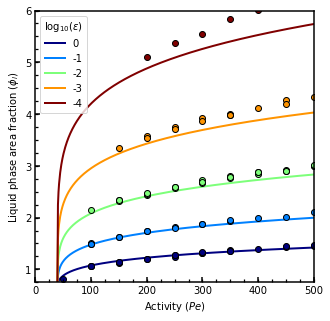

In [10]:
# Plot for figure
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# for i in epsRange:
#     ax.plot(peRange+shift, convergeConstEps(peRange, i),
#                c=cols[distEps.index(i)], label="{0:.4f}".format(i), lw=2.0, zorder=0)
for i in epsRange:
    ax.plot(peRange+shift, convergeConstEps(peRange, i),
               c=cols[distEps.index(i)], label="{0:.0f}".format(np.log10(i)), lw=2.0, zorder=0)
# ax.legend(title=r'$\log_{10}(\epsilon)$', loc='center', bbox_to_anchor=(1.15, 0.825))
ax.legend(title=r'$\log_{10}(\epsilon)$', loc='upper left')
ax.set_xlabel(r'Activity $(Pe)$')
ax.set_ylabel(r'Liquid phase area fraction $(\phi_{l})$')

# Overlay data on top of this
GAS="Gas-r=5.0"
LIQ="Liq-r=5.0"
for i in range(0, len(epsRange)):
    for j in range(0, len(all_dens)):
        if params['eps'][j] == epsRange[i]:
                ax.scatter(params['peA'][j], all_dens[j][LIQ].iloc[-1],
                           edgecolor='k', facecolor=cols[distEps.index(params['eps'][j])],
                           lw=1.0, zorder=1)
# ax[1].set_xlim(0, 500)
ax.set_xlim(0., 500.)
ax.set_ylim(0.75, 6)
# Set the x and y minor ticks
loc = ticker.MultipleLocator(base=25.)
ax.xaxis.set_minor_locator(loc)
loc = ticker.MultipleLocator(base=0.25)
ax.yaxis.set_minor_locator(loc)
# Tick width and height
ax.xaxis.set_tick_params(width=1.5, size=5.)
ax.yaxis.set_tick_params(width=1.5, size=5.)
ax.xaxis.set_tick_params(which='minor', width=1.25, size=3.)
ax.yaxis.set_tick_params(which='minor', width=1.25, size=3.)

plt.savefig('soft_phase_diagram.pdf', bbox_inches='tight', pad_inches=0.01, dpi=1000)

plt.show()

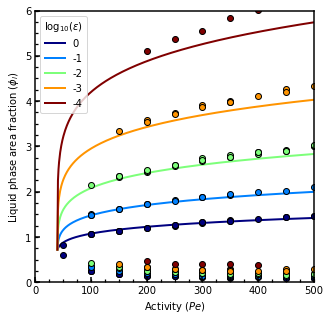

In [11]:
# Plot for figure
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# for i in epsRange:
#     ax.plot(peRange+shift, convergeConstEps(peRange, i),
#                c=cols[distEps.index(i)], label="{0:.4f}".format(i), lw=2.0, zorder=0)
for i in epsRange:
    ax.plot(peRange+shift, convergeConstEps(peRange, i),
               c=cols[distEps.index(i)], label="{0:.0f}".format(np.log10(i)), lw=2.0, zorder=0)
# ax.legend(title=r'$\log_{10}(\epsilon)$', loc='center', bbox_to_anchor=(1.15, 0.825))
ax.legend(title=r'$\log_{10}(\epsilon)$', loc='upper left')
ax.set_xlabel(r'Activity $(Pe)$')
ax.set_ylabel(r'Liquid phase area fraction $(\phi_{l})$')

# Overlay data on top of this
GAS="Gas-r=5.0"
LIQ="Liq-r=5.0"
for i in range(0, len(epsRange)):
    for j in range(0, len(all_dens)):
        if params['eps'][j] == epsRange[i]:
            if all_dens[j][LIQ].iloc[-1] > 0.75:
                ax.scatter(params['peA'][j], all_dens[j][LIQ].iloc[-1],
                           edgecolor='k', facecolor=cols[distEps.index(params['eps'][j])],
                           lw=1.0, zorder=1)
                # Plot corresponding point for the gas phase
                ax.scatter(params['peA'][j], all_dens[j][GAS].iloc[-1],
                           edgecolor='k', facecolor=cols[distEps.index(params['eps'][j])],
                           lw=1.0, zorder=1)
                
                
# ax[1].set_xlim(0, 500)
ax.set_xlim(0., 500.)
ax.set_ylim(0., 6.)
# Set the x and y minor ticks
loc = ticker.MultipleLocator(base=25.)
ax.xaxis.set_minor_locator(loc)
loc = ticker.MultipleLocator(base=0.25)
ax.yaxis.set_minor_locator(loc)
# Tick width and height
ax.xaxis.set_tick_params(width=1.5, size=5.)
ax.yaxis.set_tick_params(width=1.5, size=5.)
ax.xaxis.set_tick_params(which='minor', width=1.25, size=3.)
ax.yaxis.set_tick_params(which='minor', width=1.25, size=3.)

plt.savefig('full_phase_diagram.pdf', bbox_inches='tight', pad_inches=0.01, dpi=1000)

plt.show()

[45.0, 55.0, 65.0]


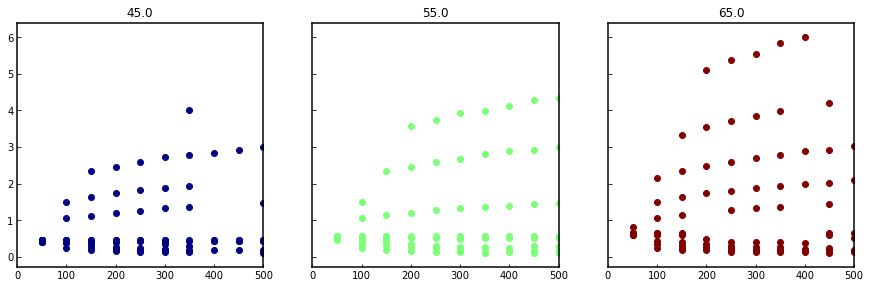

In [12]:
# Let's plot the first 4 densities side-by-side
uniquePhi = []
for i in storeVals[chkStrings.index("phi")]:
    if i not in uniquePhi:
        uniquePhi.append(i)
print(uniquePhi)

fig, ax = plt.subplots(1, len(uniquePhi), figsize=(len(uniquePhi) * 5, len(uniquePhi) * 1.5), sharey=True)
for k in range(0, len(uniquePhi)):
    for i in range(0, len(all_dens)):
        if params['phi'][i] == uniquePhi[k]:
            ax[k].scatter(params['peA'][i], all_dens[i][gas].iloc[-1], c=plt.cm.jet((params['phi'][i]-45)/20.))
            ax[k].scatter(params['peA'][i], all_dens[i][liq].iloc[-1], c=plt.cm.jet((params['phi'][i]-45)/20.))
    ax[k].set_xlim(0, 500.)
#         ax[k].set_ylim(0, 1.6)
    ax[k].set_title(uniquePhi[k])
plt.subplots_adjust(hspace=0.5)
plt.show()


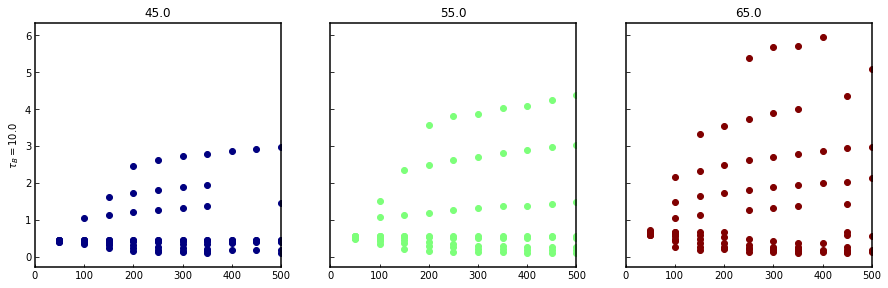

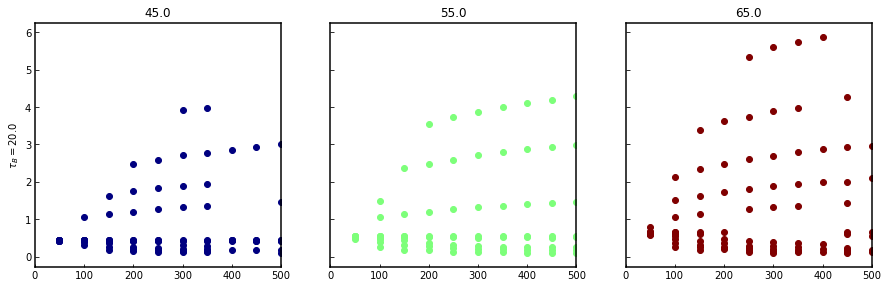

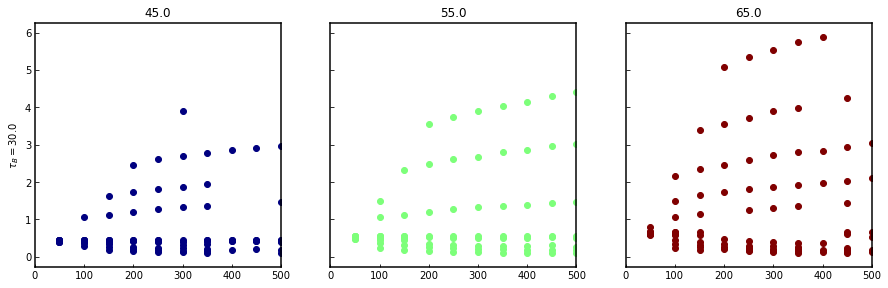

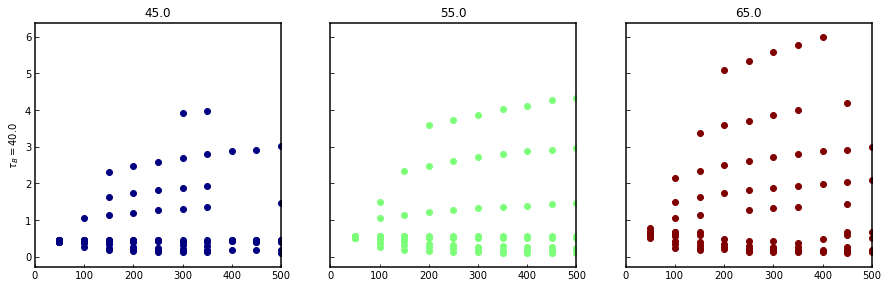

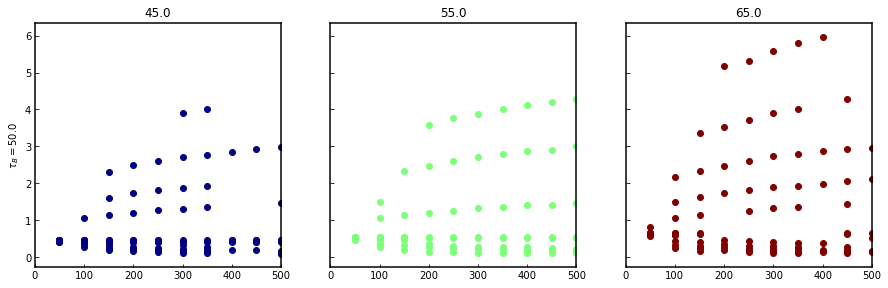

('Data unavailable:', 'cluster_phase_density_pa50.0_pb0.0_xa100.0_phi55_ep0.000.txt')


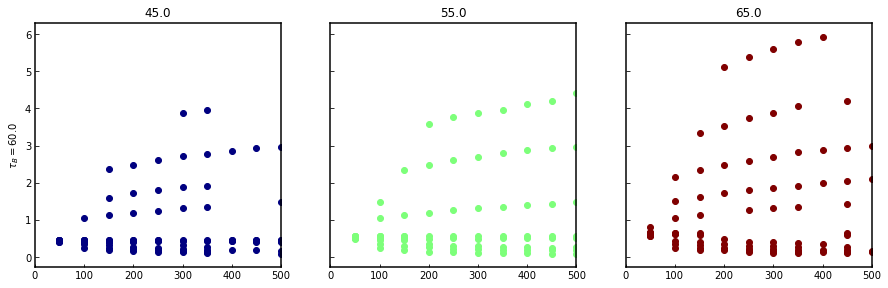

('Data unavailable:', 'cluster_phase_density_pa50.0_pb0.0_xa100.0_phi55_ep0.001.txt')


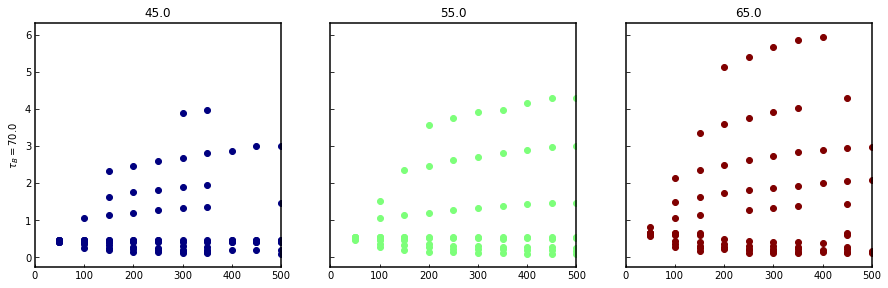

('Data unavailable:', 'cluster_phase_density_pa50.0_pb0.0_xa100.0_phi55_ep0.010.txt')


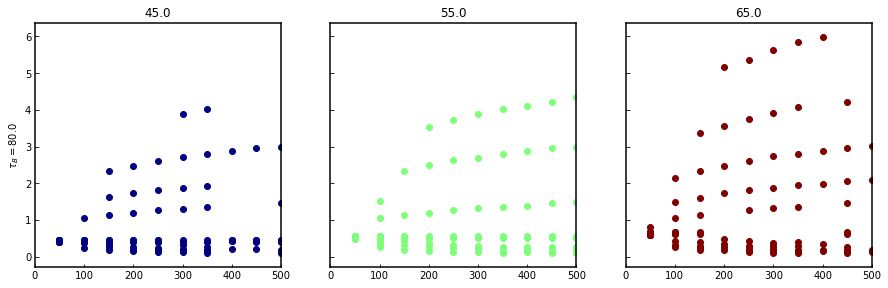

('Data unavailable:', 'cluster_phase_density_pa50.0_pb0.0_xa100.0_phi55_ep1.000.txt')


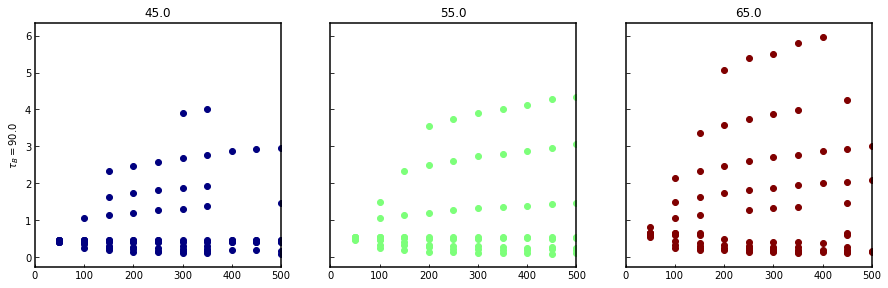

('Data unavailable:', 'cluster_phase_density_pa50.0_pb0.0_xa100.0_phi65_ep0.000.txt')


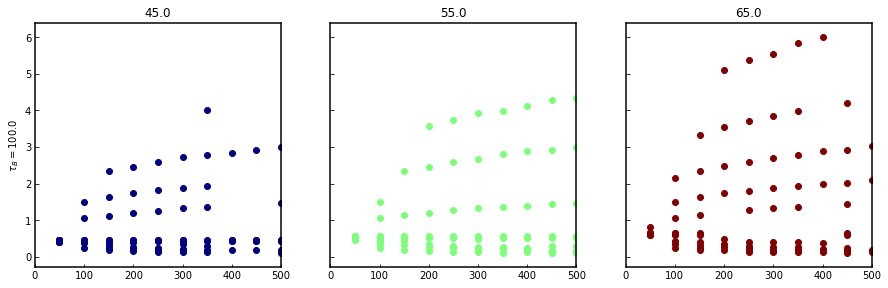

In [13]:
# Let's plot the first 4 densities side-by-side
for m in range(0, len(all_dens[0])):
    fig, ax = plt.subplots(1, len(uniquePhi), figsize=(len(uniquePhi) * 5, len(uniquePhi) * 1.5), sharey=True)
    for k in range(0, len(uniquePhi)):
        for i in range(0, len(all_dens)):
            if params['phi'][i] == uniquePhi[k]:
                try:
                    ax[k].scatter(params['peA'][i], all_dens[i][gas][m], c=plt.cm.jet((params['phi'][i]-45)/20.))
                    ax[k].scatter(params['peA'][i], all_dens[i][liq][m], c=plt.cm.jet((params['phi'][i]-45)/20.))
                except:
                    print("Data unavailable:", dens[m])
        ax[k].set_xlim(0, 500.)
    #         ax[k].set_ylim(0, 1.6)
        ax[k].set_title(uniquePhi[k])
    ax[0].set_ylabel(r'$\tau_{B}=$' + str(all_dens[i]['Timestep'][m]))
    plt.subplots_adjust(hspace=0.5)
    plt.show()

In [14]:
# Stopped editing this code here...

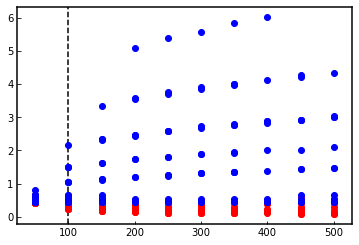

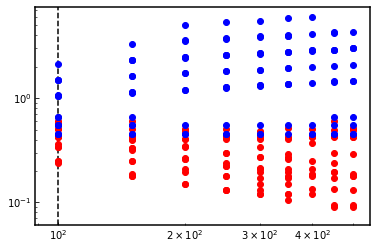

In [15]:
# Let's get an analytical expression for the local density of each phase
#  as a function of activity.
peFit = []
gas = 'Gas-r=5.0'
gasList = []
liq = 'Liq-r=5.0'
liqList = []
# dens = 50.0
for i in xrange(len(all_dens)):
#     if params['phi'][i] == dens:
    peFit.append(params['peA'][i])
    gasList.append(all_dens[i][gas].iloc[-1])
    liqList.append(all_dens[i][liq].iloc[-1])

# We can cut out low Pe data (we don't need to artificially nucleate this)
peCut = 100.
# Make sure we've grabbed the appropriate data
plt.scatter(peFit, gasList, c='r')
plt.scatter(peFit, liqList, c='b')
plt.axvline(peCut, ls='--', lw=1.5, c='k', zorder=0)
# plt.xlim(40, 70)
plt.show()

# Let's trim the data so we are only fitting phase separated data
for i in range(len(peFit)-1, -1, -1):
    if peFit[i] < peCut:
        del peFit[i]
        del gasList[i]
        del liqList[i]

# Plot to observe this trimming of data
plt.scatter(peFit, gasList, c='r')
plt.scatter(peFit, liqList, c='b')
plt.axvline(peCut, ls='--', lw=1.5, c='k', zorder=0)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

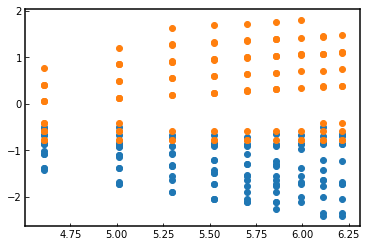

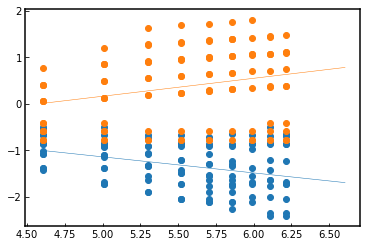

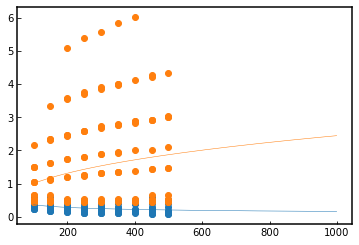

Expression for gas phase: m=-0.344643298682, b=1.78720513323
Expression for liquid phase: m=0.385160526433, b=0.170985313045


In [16]:
# Data has been trimmed looks like a power law

# Take the natural log of the data (fit to a line in logspace)
logPe = []
logGas = []
logLiq = []
for i in xrange(len(peFit)):
    logPe.append(np.log(peFit[i]))
    logGas.append(np.log(gasList[i]))
    logLiq.append(np.log(liqList[i]))
# Plot the log of the data    
plt.scatter(logPe, logGas)
plt.scatter(logPe, logLiq)
plt.show()

# Fit using linear regression
from scipy import stats
slopeG, interceptG, r_valueG, p_valueG, std_errG = stats.linregress(logPe,logGas)
slopeL, interceptL, r_valueL, p_valueL, std_errL = stats.linregress(logPe,logLiq)
rangeLog = np.arange(np.log(peCut), np.log(1000.))
def myLine(x, m, b):
    return (m*x) + b
# Plot the log of the data    
plt.scatter(logPe, logGas)
plt.scatter(logPe, logLiq)
plt.plot(rangeLog, myLine(rangeLog, slopeG, interceptG))
plt.plot(rangeLog, myLine(rangeLog, slopeL, interceptL))
plt.show()

# Plot it in real space now
rangeDat = np.arange(peCut, 1000.)
def myPow(x, m, b):
    return (x**m)*b
plt.scatter(peFit, gasList)
plt.scatter(peFit, liqList)
plt.plot(rangeDat, myPow(rangeDat, slopeG, np.exp(interceptG)))
plt.plot(rangeDat, myPow(rangeDat, slopeL, np.exp(interceptL)))
plt.show()

print("Expression for gas phase: m={}, b={}").format(slopeG, np.exp(interceptG))
print("Expression for liquid phase: m={}, b={}").format(slopeL, np.exp(interceptL))

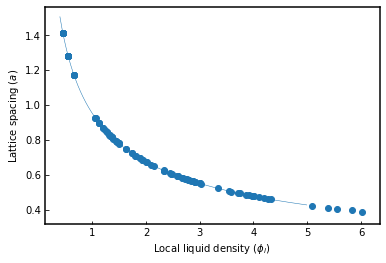

In [17]:
# Can we get the lattice spacing from the local area fraction

# We know that the lattice spacing of 1.0 has phi ~ 0.9
def phiProportion(phiIn):
    phiCP = np.pi / (2. * np.sqrt(3.))
    latCP = 1.
    return np.sqrt(phiCP / phiIn)

phis = np.arange(0.4, 5.0, 0.01)
plt.plot(phis, phiProportion(phis))
plt.scatter(liqList, phiProportion(liqList))
plt.xlabel(r'Local liquid density $(\phi_{l})$')
plt.ylabel(r'Lattice spacing $(a)$')
# plt.xlim(1., 1.5)
# plt.ylim(top=1.)
plt.show()

# print(phiProportion(1.))

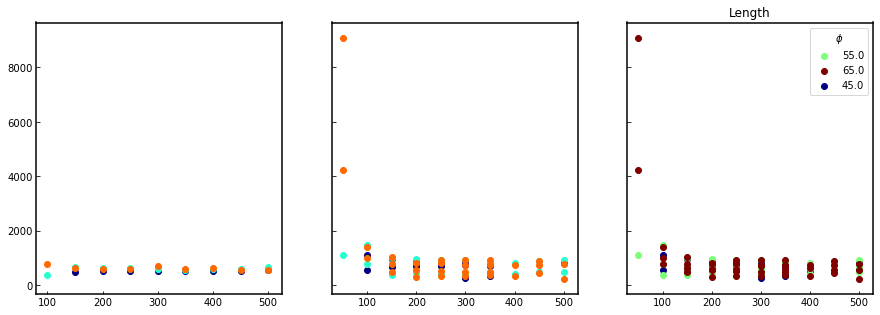

In [18]:
# Let's look at the cluster length data as it pertains to the system parameters
from collections import OrderedDict

i = 'Length'
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for j in range(0, len(params['peA'])):
    if not all_pres[j].empty:
        ax[2].scatter(params['peA'][j], all_pres[j][i], c=plt.cm.jet((params['phi'][j] - 45.)/20.), label=params['phi'][j])
        if params['eps'][j] == 0.01:
            ax[0].scatter(params['peA'][j], all_pres[j][i], c=plt.cm.jet((params['phi'][j] - 45.)/25.), label=params['phi'][j])
        else:
            ax[1].scatter(params['peA'][j], all_pres[j][i], c=plt.cm.jet((params['phi'][j] - 45.)/25.), label=params['phi'][j])
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title=r'$\phi$')
plt.title(i)
# ax[0].set_xlim(0, 500)
# ax[1].set_xlim(0, 500)
# ax[2].set_xlim(0, 500)
# ax[0].set_ylim(0, 200)
# ax[1].set_ylim(0, 200)
# ax[2].set_ylim(0, 200)

plt.show()

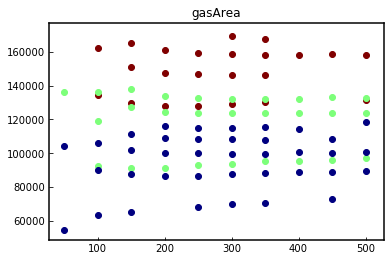

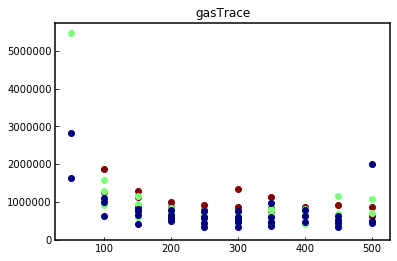

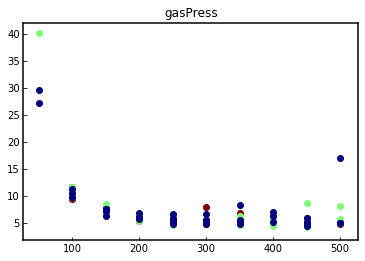

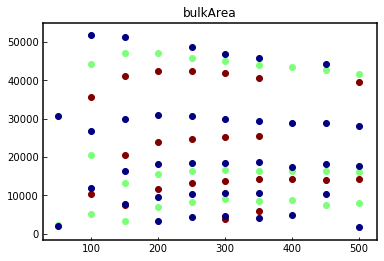

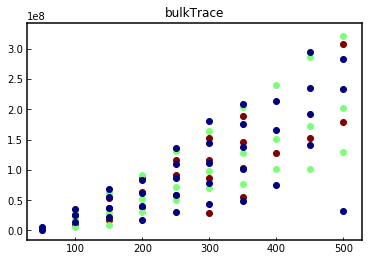

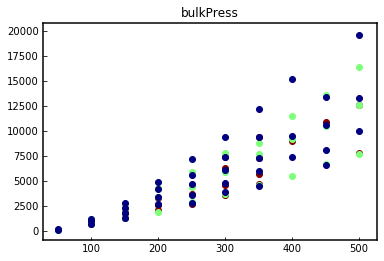

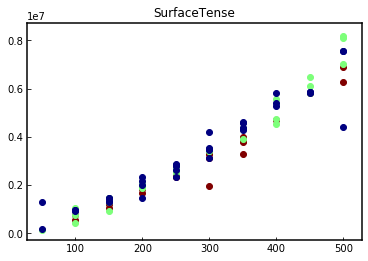

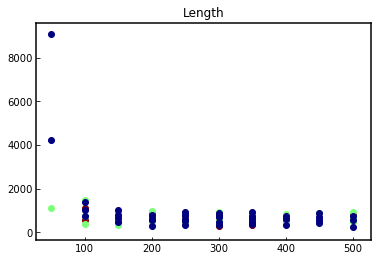

In [19]:
# Let's take a look at the pressure 
press = list(all_pres[0])
press.remove('Timestep')
for i in press:
    for j in range(0, len(all_pres)):
        if not all_pres[j].empty:
            plt.scatter(params['peA'][j], all_pres[j][i], c=plt.cm.jet((65. - params['phi'][j])/20.))
    plt.title(i)
    plt.show()

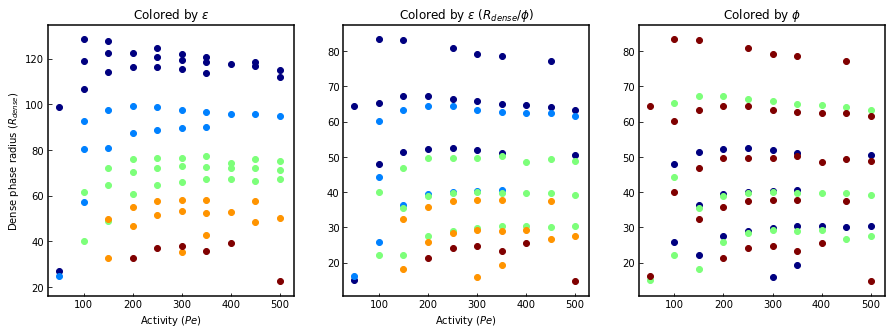

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 27.15889931364289, 0.0, 0.0, 0.0, 24.768809469099573, 98.98371888243122, 0.0, 0.0, 0.0, 57.165402530744494, 106.68922735751367, 0.0, 0.0, 40.115894869207914, 80.6597066994526, 118.76827942588085, 0.0, 0.0, 61.590181683883635, 92.53067974040727, 128.39228524185273, 0.0, 0.0, 49.181254184244914, 81.02018383330291, 114.36064825051432, 0.0, 32.98314745927422, 64.61580811811564, 122.50460207955273, 0.0, 49.906237835255006, 72.24772663406205, 97.43121727162101, 127.9365510370478, 0.0, 0.0, 60.961576077225615, 87.3828731434456, 116.30644766461427, 0.0, 46.9506354619304, 70.5323498242144, 122.5095310511706, 32.78909976080164, 55.18802033231965, 76.22775046721924, 99.29657972092988, 0.0, 0.0, 64.59700949746568, 88.89734055850248, 116.4116787073153, 0.0, 51.6115808135787, 72.00122610993668, 120.87178466421224, 36.99703038181885, 57.59879128738464, 76.37820754844105, 98.95726233859077, 124.49287869436563, 0.0, 35.39145113443756, 66.06566071379187, 89.47576

In [20]:
# Compute the dense phase radius from the area of the dense phase
def radCurve(area):
    # From area of circle get curvature
    return np.sqrt(area/np.pi)

ind = "bulkArea"
curv = []
fig, ax = plt.subplots(1, 3, figsize=(15., 5.))
for i in range(0, len(all_pres)):
    # If the dense phase exists
    if not all_pres[i].empty:
        curv.append(radCurve(all_pres[i][ind][0]))
        ax[0].scatter(params['peA'][i], curv[-1], c=cols[distEps.index(params['eps'][i])])
        ax[1].scatter(params['peA'][i], curv[-1] * (params['phi'][i] / 100.),
                      c=cols[distEps.index(params['eps'][i])])
        ax[2].scatter(params['peA'][i], curv[-1] * (params['phi'][i] / 100.),
                      c=plt.cm.jet((params['phi'][i] - 45.) / 20.))
    # If not...
    elif all_pres[i].empty:
        curv.append(0.)
ax[0].set_xlabel(r'Activity $(Pe)$')
ax[1].set_xlabel(r'Activity $(Pe)$')
ax[0].set_ylabel(r'Dense phase radius $(R_{dense})$')
ax[0].set_title(r'Colored by $\epsilon$')
ax[1].set_title(r'Colored by $\epsilon$ $(R_{dense}/\phi)$')
ax[2].set_title(r'Colored by $\phi$')
plt.show()

print(curv)

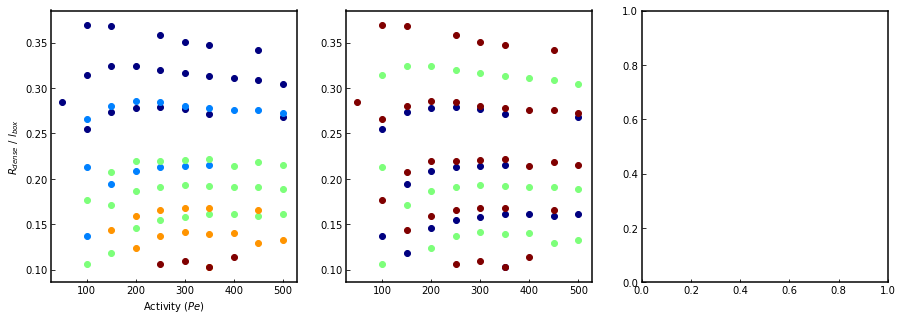

In [21]:
# For all simulatios in this file, N=100,000 I can compute l_box
def getLBox(phi, N):
    return np.sqrt(N * (np.pi * 0.25) / phi)

distLBox = []
for i in distPhi:
    distLBox.append(getLBox(i/100., 100000))
    
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(0, len(curv)):
    if (curv[i] / distLBox[distPhi.index(params['phi'][i])]) > 0.1:
        ax[0].scatter(params['peA'][i], curv[i] / distLBox[distPhi.index(params['phi'][i])],
                      c=cols[distEps.index(params['eps'][i])])
        ax[1].scatter(params['peA'][i], curv[i] / distLBox[distPhi.index(params['phi'][i])],
                      c=plt.cm.jet((params['phi'][i] - 45.) / 20.))
ax[0].set_xlabel(r'Activity $(Pe)$')
ax[0].set_ylabel(r'$R_{dense}\ / \ l_{box}$')
plt.show()

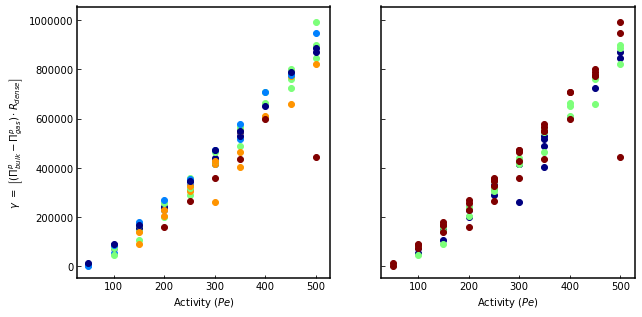

In [22]:
# Plot the simulation pressure difference times the dense phase radius
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
for i in range(0, len(all_pres)):
    if not all_pres[i].empty:
        ax[0].scatter(params['peA'][i],
                      (all_pres[i]['bulkPress'] - all_pres[i]['gasPress']) * curv[i],
                      c=cols[distEps.index(params['eps'][i])])
        ax[1].scatter(params['peA'][i],
                      (all_pres[i]['bulkPress'] - all_pres[i]['gasPress']) * curv[i],
                      c=plt.cm.jet((params['phi'][i] - 45.) / 20.))
ax[0].set_xlabel(r'Activity $(Pe)$')
ax[1].set_xlabel(r'Activity $(Pe)$')
ax[0].set_ylabel(r'$\gamma \ = \ \left[(\Pi^{p}_{bulk} - \Pi^{p}_{gas})\cdot R_{dense}\right]$')
plt.show()

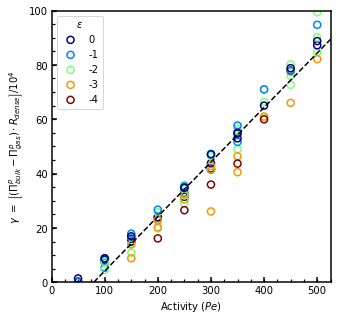

In [23]:
# Fit a line to surface tension data
pe_fit = []
ep_fit = []
surf_fit = []
for i in range(0, len(all_pres)):
    if params['eps'][i] == 0.0001 and params['phi'][i] == 65 and params['peA'][i] == 500:
        continue
    if not all_pres[i].empty:
        pe_fit.append(params['peA'][i])
        ep_fit.append(params['eps'][i])
        surf_fit.append((all_pres[i]['bulkPress'].iloc[-1] - all_pres[i]['gasPress'].iloc[-1]) * curv[i] / 10000.)

slopeST, interceptST, r_valueST, p_valueST, std_errST = stats.linregress(pe_fit, surf_fit)

def myLine(x, m, b):
    return (m*x) + b

# Plot the simulation pressure difference times the dense phase radius
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for i in range(0, len(all_pres)):
    if params['eps'][i] == 0.0001 and params['phi'][i] == 65 and params['peA'][i] == 500:
        continue
    if not all_pres[i].empty:
        ax.scatter(params['peA'][i],
                   (all_pres[i]['bulkPress'] - all_pres[i]['gasPress']) * curv[i] / 10000.,
                   facecolor='none', s=50,
                   edgecolor=cols[distEps.index(params['eps'][i])], 
                   lw=1.5,
                   label="{0:.0f}".format(np.log10(params['eps'][i])))

# Plot the fit
rangePe = np.arange(0., 600., 0.1)
plt.plot(rangePe, myLine(rangePe, slopeST, interceptST), lw=1.5, ls="--", c='k')

# Set the legend
handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title=r'$\epsilon$')
ax.set_xlim(0,525)
ax.set_ylim(0,100)
ax.set_xlabel(r'Activity $(Pe)$')
ax.set_ylabel(r'$\gamma \ = \ \left[(\Pi^{p}_{bulk} - \Pi^{p}_{gas})\cdot R_{dense}\right]/10^4$')
# Set the x and y minor ticks
loc = ticker.MultipleLocator(base=25.)
ax.xaxis.set_minor_locator(loc)
loc = ticker.MultipleLocator(base=5.)
ax.yaxis.set_minor_locator(loc)
# Tick width and height
ax.xaxis.set_tick_params(width=1.5, size=5.)
ax.yaxis.set_tick_params(width=1.5, size=5.)
ax.xaxis.set_tick_params(which='minor', width=1.25, size=3.)
ax.yaxis.set_tick_params(which='minor', width=1.25, size=3.)

plt.savefig('surface_tension.pdf', bbox_inches='tight', pad_inches=0.01, dpi=1000)
plt.show()

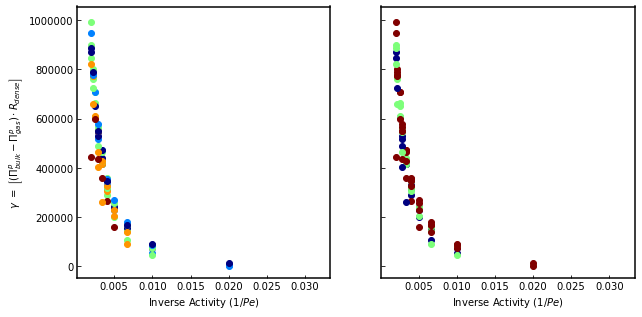

In [24]:
# Let's plot this against the inverse activity
# Plot the simulation pressure difference times the dense phase radius
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
for i in range(0, len(all_pres)):
    if not all_pres[i].empty:
        ax[0].scatter(1./params['peA'][i],
                      (all_pres[i]['bulkPress'] - all_pres[i]['gasPress']) * curv[i],
                      c=cols[distEps.index(params['eps'][i])])
        ax[1].scatter(1./params['peA'][i],
                      (all_pres[i]['bulkPress'] - all_pres[i]['gasPress']) * curv[i],
                      c=plt.cm.jet((params['phi'][i] - 45.) / 20.))
ax[0].set_xlabel(r'Inverse Activity $(1/Pe)$')
ax[1].set_xlabel(r'Inverse Activity $(1/Pe)$')
ax[0].set_ylabel(r'$\gamma \ = \ \left[(\Pi^{p}_{bulk} - \Pi^{p}_{gas})\cdot R_{dense}\right]$')
# ax[0].set_xlim(0., 0.02)
# ax[0].set_xscale('log')
# ax[0].set_yscale('log')
plt.show()

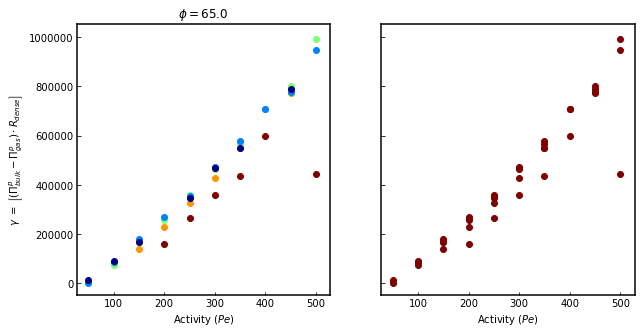

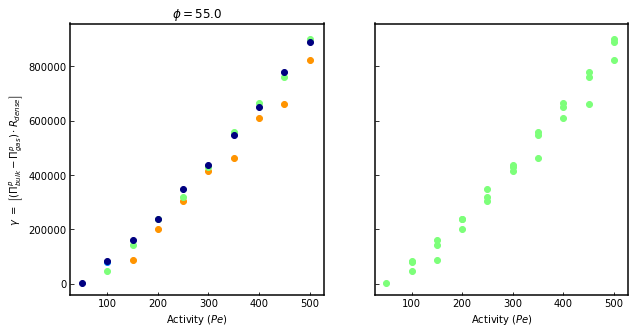

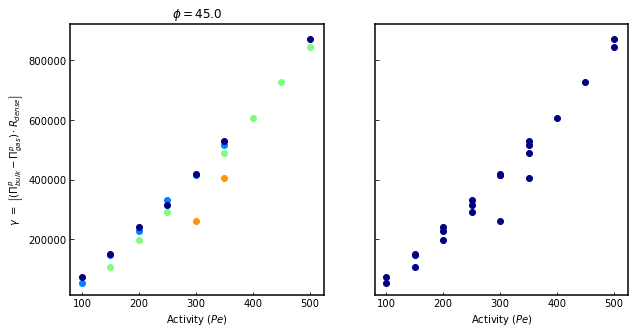

In [25]:
# Let's plot the previous plot at each system density
for b in range(0, len(distPhi)):
    # Plot the simulation pressure difference times the dense phase radius
    fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
    for i in range(0, len(all_pres)):
        if params['phi'][i] == distPhi[b]:
            if not all_pres[i].empty:
                ax[0].scatter(params['peA'][i],
                              (all_pres[i]['bulkPress'] - all_pres[i]['gasPress']) * curv[i],
                              c=cols[distEps.index(params['eps'][i])])
                ax[1].scatter(params['peA'][i],
                              (all_pres[i]['bulkPress'] - all_pres[i]['gasPress']) * curv[i],
                              c=plt.cm.jet((params['phi'][i] - 45.) / 20.))
    ax[0].set_xlabel(r'Activity $(Pe)$')
    ax[1].set_xlabel(r'Activity $(Pe)$')
    ax[0].set_ylabel(r'$\gamma \ = \ \left[(\Pi^{p}_{bulk} - \Pi^{p}_{gas})\cdot R_{dense}\right]$')
    ax[0].set_title(r'$\phi=$' + str(distPhi[b]))
    plt.show()

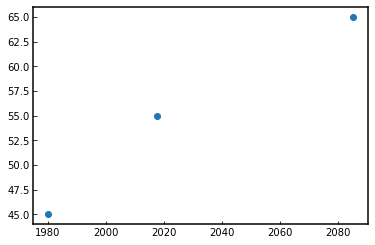

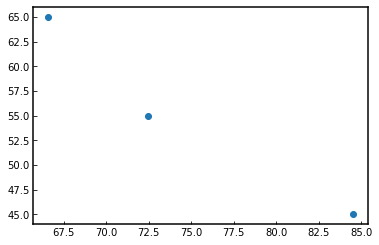

In [26]:
# Let's get the data fit at each constant density
pe_dat = []
st_dat = []

m = []    # slope
b = []    # y-intercept
r = []    # residual
p = []    # p-value
s = []    # standard error
c = []    # x-intercept

# We are storing our fits
for bb in range(0, len(distPhi)):
    pe_dat.append([])
    st_dat.append([])
    for i in range(0, len(all_pres)):
        if params['phi'][i] == distPhi[bb]:
            if not all_pres[i].empty and params['eps'][i] > 0.001:
                pe_dat[bb].append(params['peA'][i])
                st_dat[bb].append((all_pres[i]['bulkPress'].iloc[-1] - all_pres[i]['gasPress'].iloc[-1]) * curv[i])
    # Now we get our fits
    out = stats.linregress(pe_dat[bb], st_dat[bb])
    m.append(out[0])
    b.append(out[1])
    r.append(out[2])
    p.append(out[3])
    s.append(out[4])
    c.append(-out[1]/out[0])
    
plt.scatter(m, distPhi)
plt.show()

plt.scatter(c, distPhi)

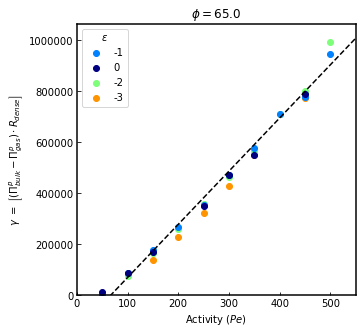

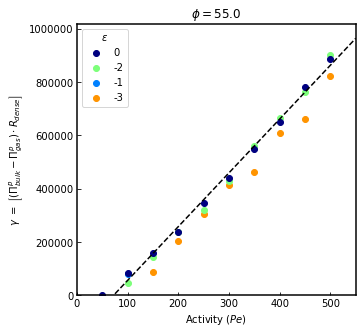

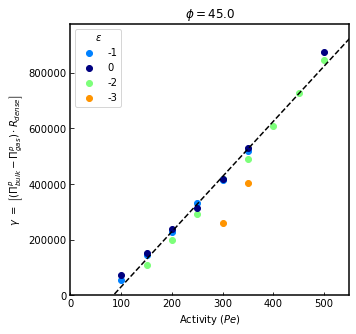

In [27]:
# Let's fit it at constant phi
inPe = np.arange(0, 550., 0.1)
# Let's plot the previous plot at each system density
for bb in range(0, len(distPhi)):
    # Plot the simulation pressure difference times the dense phase radius
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.plot(inPe, myLine(inPe, m[bb], b[bb]), lw=1.5, zorder=1, ls='--', c='k')
    for i in range(0, len(all_pres)):
        if params['phi'][i] == distPhi[bb]:
            if not all_pres[i].empty and params['eps'][i] != 0.0001:
                ax.scatter(params['peA'][i],
                              (all_pres[i]['bulkPress'] - all_pres[i]['gasPress']) * curv[i],
                              c=cols[distEps.index(params['eps'][i])],
                              label="{0:.0f}".format(np.log10(params['eps'][i])))
    ax.set_xlabel(r'Activity $(Pe)$')
    ax.set_ylabel(r'$\gamma \ = \ \left[(\Pi^{p}_{bulk} - \Pi^{p}_{gas})\cdot R_{dense}\right]$')
    ax.set_title(r'$\phi=$' + str(distPhi[bb]))
    handles, labels = ax.get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), title=r'$\epsilon$')
    ax.set_xlim(0, 550)
    ax.set_ylim(0,)
    plt.show()

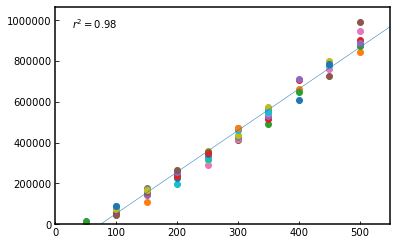

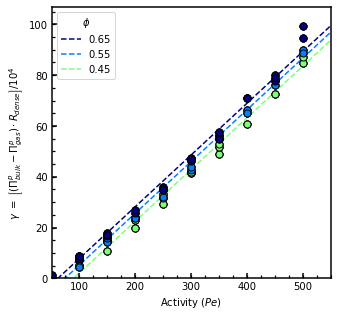

In [28]:
# The slope appears to be the same, enforce this in the fit...
allx = []
ally = []

# First find the best slope that fits all data
for i in range(0, len(all_pres)):
    if not all_pres[i].empty and params['eps'][i] > 0.001:
        allx.append(params['peA'][i])
        ally.append((all_pres[i]['bulkPress'].iloc[-1] - all_pres[i]['gasPress'].iloc[-1]) * curv[i])
        plt.scatter(allx[-1], ally[-1])
allm, allb, allr, allp, alls = stats.linregress(allx, ally)
peplot = np.arange(0.,550.,0.1)
plt.plot(peplot, myLine(peplot, allm, allb))
plt.xlim(0,550)
plt.ylim(0,)
plt.text(0.05, 0.9, r'$r^{2}=$'+'{0:.2f}'.format(allr**2), transform=plt.gca().transAxes)
plt.show()

# Then force this slope onto each constant phi data set
def forceLine(x, b):
    return (allm*x) + b

indb = []

for i in range(0, len(distPhi)):
    xdat = []
    ydat = []
    for j in range(0, len(all_pres)):
        if params['phi'][j] == distPhi[i]:
            if not all_pres[j].empty and params['eps'][j] > 0.001:
                xdat.append(params['peA'][j])
                ydat.append((all_pres[j]['bulkPress'].iloc[-1] - all_pres[j]['gasPress'].iloc[-1]) * curv[j])
    x = np.array(xdat)
    y = np.array(ydat)
    indb.append(np.mean(y - (allm*x)))

# Plot these (parallel) lines overlaid on all data
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for i in range(0, len(distPhi)):
    ax.plot(peplot, forceLine(peplot, indb[i])/10000, c=cols[i], lw=1.5, ls='--', zorder=0, label="{0:.2f}".format(distPhi[i]/100.))
    for j in range(0, len(all_pres)):
        if not all_pres[j].empty and params['eps'][j] > 0.001:
            ax.scatter(params['peA'][j],
                       (all_pres[j]['bulkPress'] - all_pres[j]['gasPress']) * curv[j] / 10000,
                       c=cols[distPhi.index(params['phi'][j])],
#                        label="{0:.2f}".format(params['phi'][j]/100.),
                       edgecolor='k', s=50,
                       zorder=1)
ax.set_xlim(50,550)
ax.set_ylim(0,)

ax.set_xlabel(r'Activity $(Pe)$')
ax.set_ylabel(r'$\gamma \ = \ \left[(\Pi^{p}_{bulk} - \Pi^{p}_{gas})\cdot R_{dense}\right]/10^{4}$')

handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title=r'$\phi$')

# Set the x and y minor ticks
loc = ticker.MultipleLocator(base=25.)
ax.xaxis.set_minor_locator(loc)
loc = ticker.MultipleLocator(base=5.)
ax.yaxis.set_minor_locator(loc)
# Tick width and height
ax.xaxis.set_tick_params(width=1.5, size=5.)
ax.yaxis.set_tick_params(width=1.5, size=5.)
ax.xaxis.set_tick_params(which='minor', width=1.25, size=3.)
ax.yaxis.set_tick_params(which='minor', width=1.25, size=3.)

plt.savefig("surface_tension_phi_dependent.pdf", dpi=1000, bbox_inches='tight', pad_inches=0.01)

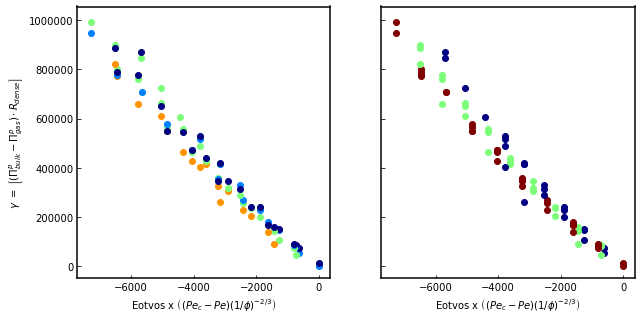

In [29]:
# Let's plot Eotvos rule
pec = 50.
# Plot the simulation pressure difference times the dense phase radius
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
for i in range(0, len(all_pres)):
    if not all_pres[i].empty:
        eot_x = (pec - params['peA'][i]) / ((1./params['phi'][i])**(2./3.))
        gamma = (all_pres[i]['bulkPress'] - all_pres[i]['gasPress']) * curv[i]
        if params['eps'][i] == 0.0001 and params['phi'][i] == 65:
            continue
        ax[0].scatter(eot_x, gamma, c=cols[distEps.index(params['eps'][i])])
        ax[1].scatter(eot_x, gamma, c=plt.cm.jet((params['phi'][i] - 45.) / 20.))
ax[0].set_xlabel(r'Eotvos x $\left((Pe_{c}-Pe)(1/\phi)^{-2/3}\right)$')
ax[1].set_xlabel(r'Eotvos x $\left((Pe_{c}-Pe)(1/\phi)^{-2/3}\right)$')
ax[0].set_ylabel(r'$\gamma \ = \ \left[(\Pi^{p}_{bulk} - \Pi^{p}_{gas})\cdot R_{dense}\right]$')
plt.show()

In [30]:
def avgCollisionForce(pe, power=1.):
    '''Computed from the integral of possible angles'''
    # We obtain this by vectorizing the collision force
    # and taking the magnitude of the resultant vector
    magnitude = np.sqrt(28.)
    # These answeres differ by a factor of 4/3
#     return (magnitude * 4. * pe) / (np.pi * np.pi)
    # This was Ehssan's solution
    return (magnitude * (pe**power)) / (np.pi)
    # This is w/ 3-body collisions as a summation
#     return magnitude * pe * 0.52

# Lennard-Jones force
def ljForce(r, eps, sigma=1.):
    div = (sigma/r)
    dU = (24. * eps / r) * ((2*(div**12)) - (div)**6)
    return dU

# Compute value by value, return lattice spacing
peCrit = 40
def convergeConstEpsR(pe, eps):
    r = 1.112
    r = 1.5
    if pe > peCrit:
        pe -= peCrit
    else:
        pe = 0
        return r
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(pe):
            r -= j
        r += j
    # This is working...
    #print("LJ force: ", ljForce(r, eps))
    #print("Collision force: ", avgCollisionForce(pe))
    return r

# Lennard-Jones pressure
def ljPress(r, eps, sigma=1.):
    div = (sigma/r)
    dU = (24. * eps / r) * ((2.*(div**12.)) - (div)**6.)
#     return dU * 6. * r
    return dU * np.sqrt(28.) * r

In [31]:
# Now use the functions to plot analytical prediction on data

# This is the range of Pe I want to compute this for
pes = np.arange(0.0, 600.0, 1.)
phiCP = np.pi / (2. * np.sqrt(3))
lat = []
pColl = []
pLJ = []
for i in range(0, len(distEps)):
    lat.append([])
    pColl.append([])
    pLJ.append([])
    for j in range(0, len(pes)):
        # Compute lattice spacing
        lat[i].append(convergeConstEpsR(pes[j], distEps[i]))
        # Get pressure from collision force
        curPColl = avgCollisionForce(pes[j]) / (np.pi * (lat[i][-1]**2) * 0.25 * phiCP)
        pColl[i].append(curPColl)
        # Get LJ pressure (sanity check)
        curPLJ = ljPress(lat[i][-1], distEps[i]) / (np.pi * (lat[i][-1]**2) * 0.25 * phiCP)
        pLJ[i].append(curPLJ)

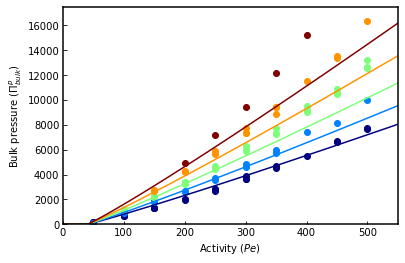

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()


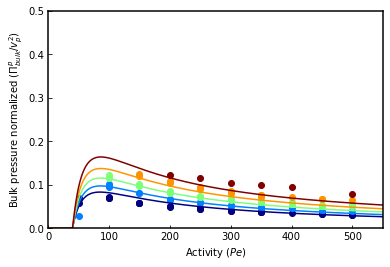

In [32]:
# Now plot the analytical approach with simulation overlaid
for i in range(0, len(distEps)):
    plt.plot(pes, pLJ[i], c=cols[i], lw=1.5)
#     plt.plot(pes, pColl[i], c=cols[i], lw=1.5)
    for j in range(0, len(params)):
        if params['eps'][j] == distEps[i] and not all_pres[j].empty:
            plt.scatter(params['peA'][j], all_pres[j]['bulkPress'], c=cols[distEps.index(params['eps'][j])])
plt.xlim(0., 550.)
plt.ylim(0., 17500.)
plt.xlabel(r'Activity $(Pe)$')
plt.ylabel(r'Bulk pressure $(\Pi^{p}_{bulk})$')
plt.show()

# Now plot the analytical approach with simulation overlaid
for i in range(0, len(distEps)):
    plt.plot(pes, pLJ[i]/pes**2, c=cols[i], lw=1.5)
#     plt.plot(pes, pColl[i]/pes**2, c=cols[i], lw=1.5)
    for j in range(0, len(params)):
        if params['eps'][j] == distEps[i] and not all_pres[j].empty:
            plt.scatter(params['peA'][j], all_pres[j]['bulkPress'] / params['peA'][j]**2,
                        c=cols[distEps.index(params['eps'][j])])
plt.xlim(0., 550.)
plt.ylim(0., 0.5)
plt.xlabel(r'Activity $(Pe)$')
plt.ylabel(r'Bulk pressure normalized $(\Pi^{p}_{bulk}/v_{p}^{2})$')
plt.show()

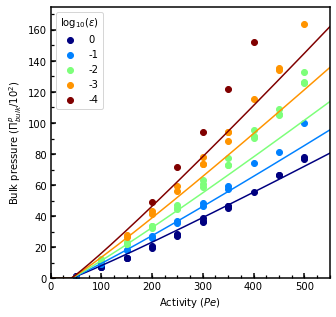

In [33]:
# Plot for figure
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# Now plot the analytical approach with simulation overlaid
for i in range(0, len(distEps)):
    plt.plot(pes, np.divide(pLJ[i], 100.), c=cols[i], lw=1.5)
    for j in range(0, len(params)):
        if params['eps'][j] == distEps[i] and not all_pres[j].empty:
            plt.scatter(params['peA'][j], all_pres[j]['bulkPress']/100.,
                        c=cols[distEps.index(params['eps'][j])],
                        label="{0:.0f}".format(np.log10(params['eps'][j])))
ax.set_xlim(0., 550.)
ax.set_ylim(0., 175.)
ax.set_xlabel(r'Activity $(Pe)$')
ax.set_ylabel(r'Bulk pressure $(\Pi^{p}_{bulk} / 10^{2})$')

# Set the legend
handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title=r'$\log_{10}(\epsilon)$')

# Set the x and y minor ticks
loc = ticker.MultipleLocator(base=25.)
ax.xaxis.set_minor_locator(loc)
loc = ticker.MultipleLocator(base=10.)
ax.yaxis.set_minor_locator(loc)
# Tick width and height
ax.xaxis.set_tick_params(width=1.5, size=5.)
ax.yaxis.set_tick_params(width=1.5, size=5.)
ax.xaxis.set_tick_params(which='minor', width=1.25, size=3.)
ax.yaxis.set_tick_params(which='minor', width=1.25, size=3.)
plt.savefig('bulk_pressure_w_fit.pdf', bbox_inches="tight", pad_inches=0.01, dpi=1000)
plt.show()

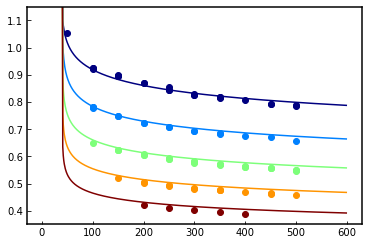

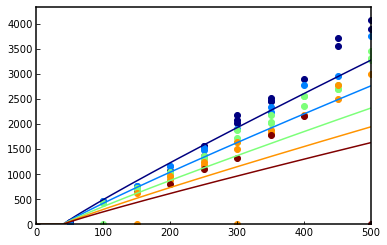

In [34]:
# What if we plot the pressure based on the area fraction from simulation
GAS="Gas-r=5.0"
LIQ="Liq-r=5.0"
exp_lats = []
exp_ljP = []
for i in range(0, len(all_dens)):
    # Compute the lattice spacing for this density
    r = phiToLat(all_dens[i][LIQ].iloc[-1])
    exp_lats.append(r)
    # Now compute the LJ pressure for this spacing
    press = ljPress(r, params['eps'][i])
    exp_ljP.append(press)
    
ana_ljP = []
for i in range(0, len(distEps)):
    ana_ljP.append([])
    for j in range(0, len(lat[i])):
        press = ljPress(lat[i][j], float(distEps[i]))
        ana_ljP[i].append(press)
    
# Plot the lattice spacing from theory and experiment
for i in range(0, len(distEps)):
    plt.plot(pes, lat[i], c=cols[i], lw=1.5)
    for j in range(0, len(all_dens)):
        # Plot at constant epsilon
        if params['eps'][j] == distEps[i]:
            plt.scatter(params['peA'][j], exp_lats[j], c=cols[distEps.index(params['eps'][j])])
plt.ylim(0.35, 1.15)
plt.show()

# Compute the pressure from the lattice spacing
for i in range(0, len(distEps)):
    plt.plot(pes, ana_ljP[i], c=cols[i], lw=1.5)
    for j in range(0, len(all_dens)):
        # Plot at constant epsilon
        if params['eps'][j] == distEps[i] and not all_pres[j].empty:
            plt.scatter(params['peA'][j], exp_ljP[j], c=cols[distEps.index(params['eps'][j])])
plt.xlim(0.,500.)
plt.ylim(0.,)
plt.show()



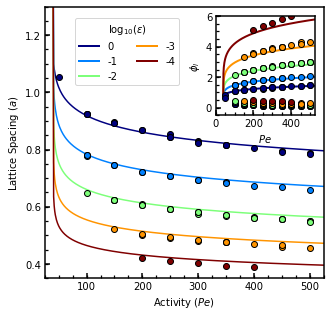

In [35]:
# Plot the lattice spacing with the liquid phase area fraction as an inset:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

GAS="Gas-r=5.0"
LIQ="Liq-r=5.0"
exp_lats = []
exp_ljP = []
for i in range(0, len(all_dens)):
    # Compute the lattice spacing for this density
    r = phiToLat(all_dens[i][LIQ].iloc[-1])
    exp_lats.append(r)
    # Now compute the LJ pressure for this spacing
    press = ljPress(r, params['eps'][i])
    exp_ljP.append(press)
    
ana_ljP = []
for i in range(0, len(distEps)):
    ana_ljP.append([])
    for j in range(0, len(lat[i])):
        press = ljPress(lat[i][j], float(distEps[i]))
        ana_ljP[i].append(press)
    
# Plot the lattice spacing from theory and experiment
for i in range(0, len(distEps)):
    ax.plot(pes, lat[i], c=cols[i], lw=1.5, zorder=1)
    for j in range(0, len(all_dens)):
        # Plot at constant epsilon
        if params['eps'][j] == distEps[i]:
            if exp_lats[j] > 1.112:
                continue
            ax.scatter(params['peA'][j], exp_lats[j], c=cols[distEps.index(params['eps'][j])], edgecolor='k', zorder=2)
ax.set_xlim(25, 525)
ax.set_ylim(0.35, 1.3)

ax.set_xlabel(r'Activity $(Pe)$')
ax.set_ylabel(r'Lattice Spacing $(a)$')

# Set the x and y minor ticks
loc = ticker.MultipleLocator(base=25.)
ax.xaxis.set_minor_locator(loc)
loc = ticker.MultipleLocator(base=0.05)
ax.yaxis.set_minor_locator(loc)
# Tick width and height
ax.xaxis.set_tick_params(width=1.5, size=5.)
ax.yaxis.set_tick_params(width=1.5, size=5.)
ax.xaxis.set_tick_params(which='minor', width=1.25, size=3.)
ax.yaxis.set_tick_params(which='minor', width=1.25, size=3.)

left = 0.6
bottom = 0.578
width = 0.275
height = 0.275
ax2 = fig.add_axes([left, bottom, width, height])
for i in epsRange:
    ax2.plot(peRange+shift, convergeConstEps(peRange, i),
               c=cols[distEps.index(i)], label="{0:.0f}".format(np.log10(i)), lw=2.0, zorder=0)
# ax.legend(title=r'$\log_{10}(\epsilon)$', loc='center', bbox_to_anchor=(1.15, 0.825))
ax2.legend(ncol=2, title=r'$\log_{10}(\epsilon)$', bbox_transform=ax.transAxes, bbox_to_anchor=[0.5, 0.975]).set_zorder(-1)
# ax2.set_xlabel(r'Activity $(Pe)$')
# ax2.set_ylabel(r'Liquid phase area fraction $(\phi_{l})$')
ax2.set_xlabel(r'$Pe$')
ax2.set_ylabel(r'$\phi_{l}$')

# Overlay data on top of this
GAS="Gas-r=5.0"
LIQ="Liq-r=5.0"
for i in range(0, len(epsRange)):
    for j in range(0, len(all_dens)):
        if params['eps'][j] == epsRange[i]:
                if all_dens[j][LIQ].iloc[-1] < 0.75:
                    continue
                ax2.scatter(params['peA'][j], all_dens[j][LIQ].iloc[-1],
                           edgecolor='k', facecolor=cols[distEps.index(params['eps'][j])],
                           lw=1.0, zorder=1)
                ax2.scatter(params['peA'][j], all_dens[j][GAS].iloc[-1],
                           edgecolor='k', facecolor=cols[distEps.index(params['eps'][j])],
                           lw=1.0, zorder=1)
# ax[1].set_xlim(0, 500)
ax2.set_xlim(0., 525.)
ax2.set_ylim(-0.5, 6)
# Set the x and y minor ticks
loc = ticker.MultipleLocator(base=50.)
ax2.xaxis.set_minor_locator(loc)
loc = ticker.MultipleLocator(base=0.5)
ax2.yaxis.set_minor_locator(loc)
# Tick width and height
ax2.xaxis.set_tick_params(width=1.5, size=5.)
ax2.yaxis.set_tick_params(width=1.5, size=5.)
ax2.xaxis.set_tick_params(which='minor', width=1.25, size=3.)
ax2.yaxis.set_tick_params(which='minor', width=1.25, size=3.)

plt.savefig('lattice_prediction_inset_density.pdf', bbox_inches='tight', pad_inches=0.01, dpi=1000)

plt.show()

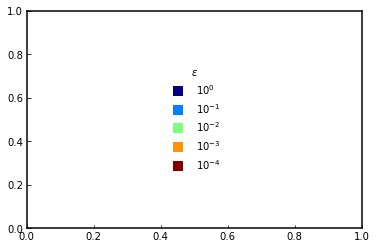

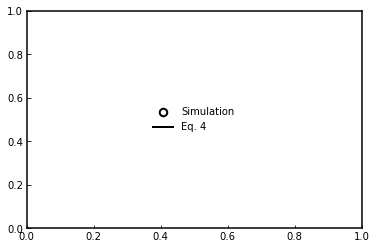

In [115]:
# Let's make a custom legend so I don't have to deal with python's BS
msz = 7.5
med = 2.0
mk = 's'
fsize=10

# Without fill
cus_leg = [Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med, markeredgecolor=cols[0], label=r'$10^{0}$', markerfacecolor='none', markersize=msz),
           Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med, markeredgecolor=cols[1], label=r'$10^{-1}$', markerfacecolor='none', markersize=msz),
           Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med, markeredgecolor=cols[2], label=r'$10^{-2}$', markerfacecolor='none', markersize=msz),
           Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med, markeredgecolor=cols[3], label=r'$10^{-3}$', markerfacecolor='none', markersize=msz),
           Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med, markeredgecolor=cols[4], label=r'$10^{-4}$', markerfacecolor='none', markersize=msz)]

# With fill
cus_leg = [Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med, markeredgecolor=cols[0], label=r'$10^{0}$', markerfacecolor=cols[0], markersize=msz),
           Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med, markeredgecolor=cols[1], label=r'$10^{-1}$', markerfacecolor=cols[1], markersize=msz),
           Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med, markeredgecolor=cols[2], label=r'$10^{-2}$', markerfacecolor=cols[2], markersize=msz),
           Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med, markeredgecolor=cols[3], label=r'$10^{-3}$', markerfacecolor=cols[3], markersize=msz),
           Line2D([0], [0], lw=0., marker=mk, markeredgewidth=med, markeredgecolor=cols[4], label=r'$10^{-4}$', markerfacecolor=cols[4], markersize=msz)]



fig, ax = plt.subplots()
ax.legend(title=r'$\epsilon$', handles=cus_leg, loc='center', fontsize=fsize, frameon=False)
plt.show()

# Make a simulation vs theory legend
leg_two = [Line2D([0], [0], lw=0., marker='o', markeredgewidth=med, markeredgecolor='k', label=r'Simulation', markerfacecolor='none', markersize=msz),
           Line2D([0], [0], lw=med, c='k', markeredgecolor='none', label=r'Eq. 4', markerfacecolor='none', markersize=msz)]


fig, ax = plt.subplots()
ax.legend(handles=leg_two, loc='center', fontsize=fsize, frameon=False)
plt.show()


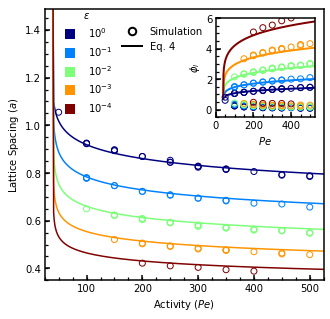

In [123]:
# Plot the lattice spacing with the liquid phase area fraction as an inset:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

GAS="Gas-r=5.0"
LIQ="Liq-r=5.0"
exp_lats = []
exp_ljP = []
for i in range(0, len(all_dens)):
    # Compute the lattice spacing for this density
    r = phiToLat(all_dens[i][LIQ].iloc[-1])
    exp_lats.append(r)
    # Now compute the LJ pressure for this spacing
    press = ljPress(r, params['eps'][i])
    exp_ljP.append(press)
    
ana_ljP = []
for i in range(0, len(distEps)):
    ana_ljP.append([])
    for j in range(0, len(lat[i])):
        press = ljPress(lat[i][j], float(distEps[i]))
        ana_ljP[i].append(press)
    
# Plot the lattice spacing from theory and experiment
for i in range(0, len(distEps)):
    ax.plot(pes, lat[i], c=cols[i], lw=1.5, zorder=1)
    for j in range(0, len(all_dens)):
        # Plot at constant epsilon
        if params['eps'][j] == distEps[i]:
            if exp_lats[j] > 1.112:
                continue
            ax.scatter(params['peA'][j], exp_lats[j], edgecolor=cols[distEps.index(params['eps'][j])], facecolor='none', zorder=2)
ax.set_xlim(25, 525)
ax.set_ylim(0.35, 1.49)

ax.set_xlabel(r'Activity $(Pe)$')
ax.set_ylabel(r'Lattice Spacing $(a)$')

# Set the x and y minor ticks
loc = ticker.MultipleLocator(base=25.)
ax.xaxis.set_minor_locator(loc)
loc = ticker.MultipleLocator(base=0.05)
ax.yaxis.set_minor_locator(loc)
# Tick width and height
ax.xaxis.set_tick_params(width=1.5, size=5.)
ax.yaxis.set_tick_params(width=1.5, size=5.)
ax.xaxis.set_tick_params(which='minor', width=1.25, size=3.)
ax.yaxis.set_tick_params(which='minor', width=1.25, size=3.)

left = 0.6
bottom = 0.578
width = 0.275
height = 0.275
ax2 = fig.add_axes([left, bottom, width, height])
for i in epsRange:
    ax2.plot(peRange+shift, convergeConstEps(peRange, i),
               c=cols[distEps.index(i)], label="{0:.0f}".format(np.log10(i)), lw=2.0, zorder=0)
# ax.legend(title=r'$\log_{10}(\epsilon)$', loc='center', bbox_to_anchor=(1.15, 0.825))
# ax2.legend(ncol=2, title=r'$\epsilon$', bbox_transform=ax.transAxes, bbox_to_anchor=[0.5, 0.975]).set_zorder(-1)
eps_leg = ax2.legend(title=r'$\epsilon$', handles=cus_leg, fontsize=fsize, frameon=False, 
                     bbox_transform=ax.transAxes, bbox_to_anchor=[0.275, 1.025])
ax2.add_artist(eps_leg)
ax2.legend(handles=leg_two, fontsize=fsize, frameon=False, 
           bbox_transform=ax.transAxes, bbox_to_anchor=[0.6, 0.9675])
# ax2.set_xlabel(r'Activity $(Pe)$')
# ax2.set_ylabel(r'Liquid phase area fraction $(\phi_{l})$')
ax2.set_xlabel(r'$Pe$')
ax2.set_ylabel(r'$\phi_{l}$')

# Overlay data on top of this
GAS="Gas-r=5.0"
LIQ="Liq-r=5.0"
for i in range(0, len(epsRange)):
    for j in range(0, len(all_dens)):
        if params['eps'][j] == epsRange[i]:
                if all_dens[j][LIQ].iloc[-1] < 0.75:
                    continue
                ax2.scatter(params['peA'][j], all_dens[j][LIQ].iloc[-1],
                           facecolor='none', edgecolor=cols[distEps.index(params['eps'][j])],
                           lw=1.0, zorder=1)
                ax2.scatter(params['peA'][j], all_dens[j][GAS].iloc[-1],
                           facecolor='none', edgecolor=cols[distEps.index(params['eps'][j])],
                           lw=1.0, zorder=1)
# ax[1].set_xlim(0, 500)
ax2.set_xlim(0., 525.)
ax2.set_ylim(-0.5, 6)
# Set the x and y minor ticks
loc = ticker.MultipleLocator(base=50.)
ax2.xaxis.set_minor_locator(loc)
loc = ticker.MultipleLocator(base=0.5)
ax2.yaxis.set_minor_locator(loc)
# Tick width and height
ax2.xaxis.set_tick_params(width=1.5, size=5.)
ax2.yaxis.set_tick_params(width=1.5, size=5.)
ax2.xaxis.set_tick_params(which='minor', width=1.25, size=3.)
ax2.yaxis.set_tick_params(which='minor', width=1.25, size=3.)

plt.savefig('lattice_prediction_inset_density.pdf', bbox_inches='tight', pad_inches=0.01, dpi=1000)

plt.show()

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in divide
  


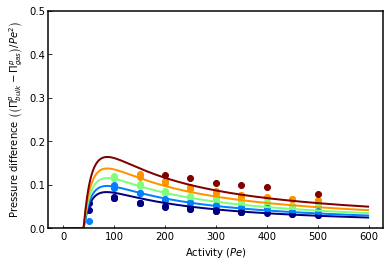

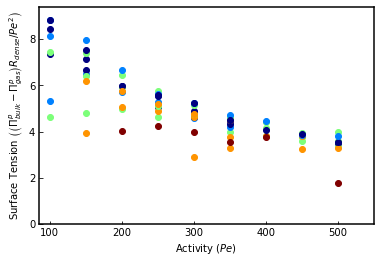

In [36]:
## Let's plot this like Brady does (y/x^2)
for j in range(0, len(all_pres)):
    if not all_pres[j].empty:
        plt.scatter(params['peA'][j], (all_pres[j]['bulkPress'] - all_pres[j]['gasPress']) / (params['peA'][j]**2),
                    c=cols[distEps.index(params['eps'][j])])

for i in range(0, len(distEps)): 
    plt.plot(pes, pLJ[i]/(pes**2), lw=2., c=cols[i], label=r'$tr(\sigma^{p})/2$')
plt.xlabel(r'Activity $(Pe)$')
plt.ylabel(r'Pressure difference $\left(\left(\Pi^{p}_{bulk}-\Pi^{p}_{gas}\right)/Pe^{2}\right)$')
# plt.xlim(85,550)
plt.ylim(0, 0.5)
# plt.ylim(0, 40000)
# plt.legend()
plt.show()

## Let's plot this like Brady does (y/x^2)
for j in range(0, len(all_pres)):
    if not all_pres[j].empty:
        plt.scatter(params['peA'][j], (all_pres[j]['bulkPress'] - all_pres[j]['gasPress']) * curv[j] / (params['peA'][j]**2),
                    c=cols[distEps.index(params['eps'][j])])

# for i in range(0, len(distEps)): 
#     plt.plot(pes, pLJ[i]/(pes**2), lw=2., c=cols[i], label=r'$tr(\sigma^{p})/2$')
# # plt.ylim(0, 0.5)
# # plt.ylim(0, 40000)
# # plt.legend()
plt.xlabel(r'Activity $(Pe)$')
plt.ylabel(r'Surface Tension $\left(\left(\Pi^{p}_{bulk}-\Pi^{p}_{gas}\right)R_{dense}/Pe^{2}\right)$')
plt.xlim(85,550)
plt.show()

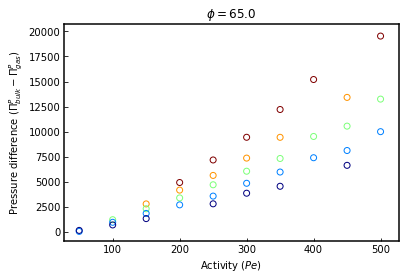

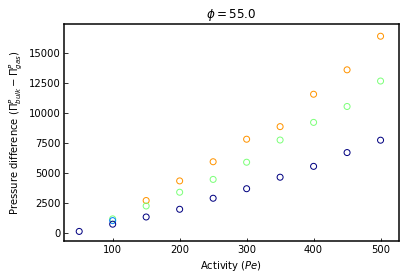

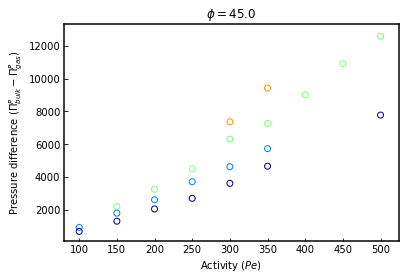

In [37]:
# Plot the pressure difference
for h in distPhi:
    for i in range(0, len(all_pres)):
        if params['phi'][i] != h:
            continue
        if not all_pres[i].empty:
            plt.scatter(params['peA'][i],
                        (all_pres[i]['bulkPress'][0] - all_pres[i]['gasPress'][0]) / (params['peA'][i]**0),
                        edgecolors=cols[distEps.index(params['eps'][i])], facecolor='none')
#     plt.xlim(0, 1000)
#     plt.ylim(0, 25000)
    plt.title(r'$\phi=$' + str(h))
    plt.xlabel(r'Activity $(Pe)$')
    plt.ylabel(r'Pressure difference $(\Pi^{P}_{bulk} - \Pi^{P}_{gas})$')
    plt.show()

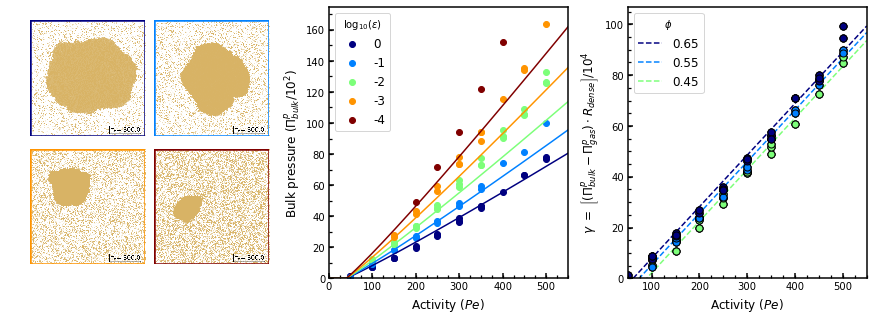

In [38]:
# Make a figure which includes: 
# -pressure (w/ analytical expression)
# -shrinking cluster images
# -surface tension

fsize=12

# Sort high to low
def doSort(inList):
    for i in range(0, len(inList)):
        for j in range(0, len(inList)):
            if inList[i] > inList[j] and i > j:
                inList[i], inList[j] = inList[j], inList[i]
    return inList

from PIL import Image
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches

imgs = []
im_ep = []
imPath = '/Users/kolbt/Desktop/soft_figures/shrinking_cluster'
shrinkDir = os.listdir(imPath)
# Get images for plotting
for i in shrinkDir:
    if i[0:19] == 'cluster_pe300_phi65' and i[-4:] == '.png':
        imgs.append(i)
        im_ep.append(txtValue(i, 'eps'))

# Sort images
doSort(im_ep) 
doSort(imgs)
# Delete middle softness
del im_ep[2]
del imgs[2]
rect_col = list(np.copy(cols))
del rect_col[2]

ld_img = []
# Crop images
for i in imgs:
    im = Image.open(imPath + '/' + i)
    width, height = im.size 
    halfH = height / 2.
    halfW = width / 2.
    im1 = im.crop((halfW-halfH, 0, halfW+halfH, height)) 
    ld_img.append(im1)
    

# Width = 17.1cm
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
    
# Instantiate figure
# fig = plt.figure(figsize=cm2inch(18.2, 6.1))
fig = plt.figure(figsize=(15, 5))
# The parent gridspec
gs = gridspec.GridSpec(1, 3, figure=fig)

# Image gridspec
gs0 = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=gs[0], wspace=0.075, hspace=-0.1)
ax = []
ax.append(fig.add_subplot(gs0[0, 0]))
ax.append(fig.add_subplot(gs0[0, 1]))
ax.append(fig.add_subplot(gs0[1, 0]))
ax.append(fig.add_subplot(gs0[1, 1]))

# The plot gridspec
ax.append(fig.add_subplot(gs[1]))
ax.append(fig.add_subplot(gs[2]))

# Plot the cropped images
for i in range(0, len(ld_img)):
    ax[i].imshow(ld_img[i])
    ax[i].add_patch(patches.Rectangle((0, 0), 1, 1, linewidth=2.5, 
                                      edgecolor=rect_col[i], facecolor='none',
                                      transform=ax[i].transAxes))
    ax[i].set_axis_off()
    ax[i].set_aspect('equal')
    
# Plot the pressure
for i in range(0, len(distEps)):
    ax[4].plot(pes, np.divide(pLJ[i], 100.), c=cols[i], lw=1.5)
    for j in range(0, len(params)):
        if params['eps'][j] == distEps[i] and not all_pres[j].empty:
            ax[4].scatter(params['peA'][j], all_pres[j]['bulkPress']/100.,
                          c=cols[distEps.index(params['eps'][j])],
                          label="{0:.0f}".format(np.log10(params['eps'][j])))
ax[4].set_xlim(0., 550.)
ax[4].set_ylim(0., 175.)
ax[4].set_xlabel(r'Activity $(Pe)$', fontsize=fsize)
ax[4].set_ylabel(r'Bulk pressure $(\Pi^{p}_{bulk} / 10^{2})$', fontsize=fsize)

# Set the legend
handles, labels = ax[4].get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax[4].legend(by_label.values(), by_label.keys(), title=r'$\log_{10}(\epsilon)$', fontsize=fsize)

# Set the x and y minor ticks
loc = ticker.MultipleLocator(base=25.)
ax[4].xaxis.set_minor_locator(loc)
loc = ticker.MultipleLocator(base=10.)
ax[4].yaxis.set_minor_locator(loc)
# Tick width and height
ax[4].xaxis.set_tick_params(width=1.5, size=5.)
ax[4].yaxis.set_tick_params(width=1.5, size=5.)
ax[4].xaxis.set_tick_params(which='minor', width=1.25, size=3.)
ax[4].yaxis.set_tick_params(which='minor', width=1.25, size=3.)

# Plot the Surface tension
for i in range(0, len(distPhi)):
    ax[5].plot(peplot, forceLine(peplot, indb[i])/10000, c=cols[i], lw=1.5, ls='--', zorder=0, label="{0:.2f}".format(distPhi[i]/100.))
    for j in range(0, len(all_pres)):
        if not all_pres[j].empty and params['eps'][j] > 0.001:
            ax[5].scatter(params['peA'][j],
                       (all_pres[j]['bulkPress'] - all_pres[j]['gasPress']) * curv[j] / 10000,
                       c=cols[distPhi.index(params['phi'][j])],
#                        label="{0:.2f}".format(params['phi'][j]/100.),
                       edgecolor='k', s=50,
                       zorder=1)
ax[5].set_xlim(50,550)
ax[5].set_ylim(0,)

ax[5].set_xlabel(r'Activity $(Pe)$', fontsize=fsize)
ax[5].set_ylabel(r'$\gamma \ = \ \left[(\Pi^{p}_{bulk} - \Pi^{p}_{gas})\cdot R_{dense}\right]/10^{4}$', fontsize=fsize)

handles, labels = ax[5].get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax[5].legend(by_label.values(), by_label.keys(), title=r'$\phi$', fontsize=fsize)

# Set the x and y minor ticks
loc = ticker.MultipleLocator(base=25.)
ax[5].xaxis.set_minor_locator(loc)
loc = ticker.MultipleLocator(base=5.)
ax[5].yaxis.set_minor_locator(loc)
# Tick width and height
ax[5].xaxis.set_tick_params(width=1.5, size=5.)
ax[5].yaxis.set_tick_params(width=1.5, size=5.)
ax[5].xaxis.set_tick_params(which='minor', width=1.25, size=3.)
ax[5].yaxis.set_tick_params(which='minor', width=1.25, size=3.)

gs.update(wspace=0.25)

plt.savefig('shrinking_fig.pdf', bbox_inches='tight', pad_inches=0.01, dpi=1000)
plt.show()

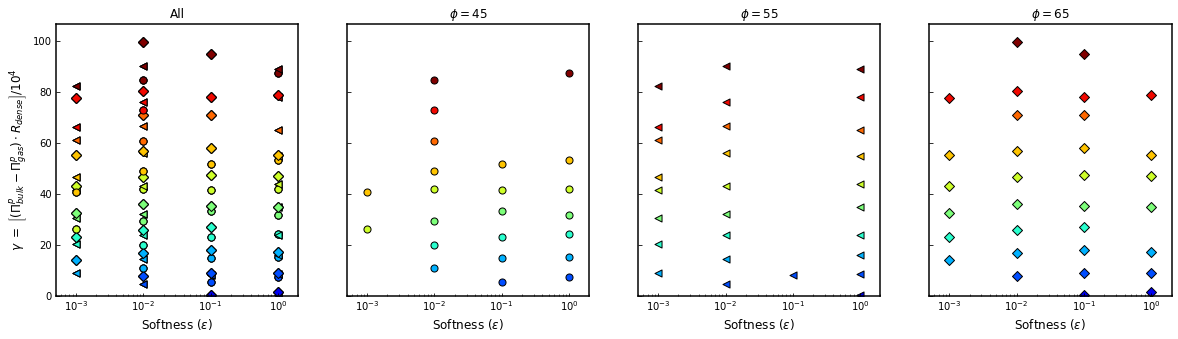

In [39]:
# Let's add a plot of epsilon vs. surface tension and color by activity
shapes = ['o', '<', 'D']
denses = [45, 55, 65]

fig, ax = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# First plot has all data
for i in range(0, len(distPhi)):
    for j in range(0, len(all_pres)):
        if not all_pres[j].empty and params['eps'][j] > 0.0001:
            ax[0].scatter(params['eps'][j],
                       (all_pres[j]['bulkPress'] - all_pres[j]['gasPress']) * curv[j] / 10000,
                       c=plt.cm.jet(params['peA'][j]/500.),
                       edgecolor='k', s=50,
                       marker=shapes[denses.index(params['phi'][j])],
                       zorder=1)
        if distPhi[i] == params['phi'][j] and not all_pres[j].empty and params['eps'][j] > 0.0001:
            sp = denses.index(params['phi'][j]) + 1
            ax[sp].scatter(params['eps'][j],
                       (all_pres[j]['bulkPress'] - all_pres[j]['gasPress']) * curv[j] / 10000,
                       c=plt.cm.jet(params['peA'][j]/500.),
                       edgecolor='k', s=50,
                       marker=shapes[denses.index(params['phi'][j])],
                       zorder=1)
        
titles = ['All', r'$\phi=45$', r'$\phi=55$', r'$\phi=65$']
ax[0].set_ylabel(r'$\gamma \ = \ \left[(\Pi^{p}_{bulk} - \Pi^{p}_{gas})\cdot R_{dense}\right]/10^{4}$', fontsize=fsize)

for i in range(0, 4):
    ax[i].set_xlabel(r'Softness $(\epsilon)$', fontsize=fsize)
    ax[i].set_xlim(10**-3/2,2)
    ax[i].set_ylim(0,)
    ax[i].set_xscale('log')
    ax[i].set_title(titles[i])
plt.show()

[0.4349583853526461, 0.41386046187542025, 0.2919526698520781, 0.209727958839744, 0.1894260352025731, 0.15592188705157717, 1.2232606126119518, 0.0007794339254595602, 0.9470592916605055, 5.336206419018583]


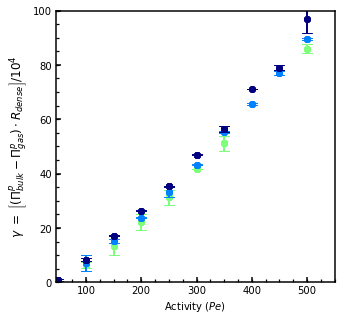

In [40]:
# Let's take the average and standard deviation in surface tension at the same activity and density
distPe = []
for i in range(0, len(params['peA'])):
    if params['peA'][i] not in distPe:
        distPe.append(params['peA'][i])
distPe.sort()

sums = [ [0 for i in distPe] for j in distPhi ]
ns = [ [0 for i in distPe] for j in distPhi ]
avg = [ [None for i in distPe] for j in distPhi ]
sd = [ [0 for i in distPe] for j in distPhi ]

for i in range(0, len(distPe)):
    for j in range(0, len(distPhi)):
        for k in range(0, len(all_pres)):
            if params['peA'][k] == distPe[i]:
                if params['phi'][k] == distPhi[j]:
                    if not all_pres[k].empty and params['eps'][k] > 0.001:
                        sums[j][i] += ((all_pres[k]['bulkPress'].iloc[-1] - all_pres[k]['gasPress'].iloc[-1]) * curv[k] / 10000)
                        ns[j][i] += 1.

# Compute the average                        
for i in range(0, len(distPe)):
    for j in range(0, len(distPhi)):
        if ns[j][i] != 0:
            avg[j][i] = sums[j][i] / ns[j][i]

# Compute the standard deviation
for i in range(0, len(distPe)):
    for j in range(0, len(distPhi)):
        for k in range(0, len(all_pres)):
            if params['peA'][k] == distPe[i]:
                if params['phi'][k] == distPhi[j]:
                    if not all_pres[k].empty and params['eps'][k] > 0.001:
                        sd[j][i] += (((all_pres[k]['bulkPress'].iloc[-1] - all_pres[k]['gasPress'].iloc[-1]) * curv[k] / 10000) - avg[j][i])**2

# Continue computing standard deviaiton
for i in range(0, len(distPe)):
    for j in range(0, len(distPhi)):
        if ns[j][i] > 1: 
            sd[j][i] /= ns[j][i]
            
print(max(sd))

# Let's plot it
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for i in range(0, len(distPe)):
    for j in range(0, len(distPhi)):
        for k in range(0, len(all_pres)):
            if params['peA'][k] == distPe[i]:
                if params['phi'][k] == distPhi[j]:
                    if ns[j][i] > 1:
                        ax.scatter(params['peA'][k],
                                    avg[j][i],
                                    c=cols[distPhi.index(params['phi'][k])],
                                   zorder=denses.index(params['phi'][k]))
                        ax.errorbar(params['peA'][k],
                                     avg[j][i],
                                     sd[j][i],
                                     capsize=5,
                                     c=cols[distPhi.index(params['phi'][k])],
                                     elinewidth=2.0,
                                     zorder=denses.index(params['phi'][k]))
ax.set_xlim(45, 550)
ax.set_ylim(0, 100)
ax.set_xlabel(r'Activity $(Pe)$')
ax.set_ylabel(r'$\gamma \ = \ \left[(\Pi^{p}_{bulk} - \Pi^{p}_{gas})\cdot R_{dense}\right]/10^{4}$', fontsize=fsize)

# Set the x and y minor ticks
loc = ticker.MultipleLocator(base=25.)
ax.xaxis.set_minor_locator(loc)
loc = ticker.MultipleLocator(base=5.)
ax.yaxis.set_minor_locator(loc)
# Tick width and height
ax.xaxis.set_tick_params(width=1.5, size=5.)
ax.yaxis.set_tick_params(width=1.5, size=5.)
ax.xaxis.set_tick_params(which='minor', width=1.25, size=3.)
ax.yaxis.set_tick_params(which='minor', width=1.25, size=3.)

plt.show()

In [41]:
# # Make a figure which includes: 
# # -pressure (w/ analytical expression)
# # -shrinking cluster images
# # -surface tension

# fsize=12

# # Sort high to low
# def doSort(inList):
#     for i in range(0, len(inList)):
#         for j in range(0, len(inList)):
#             if inList[i] > inList[j] and i > j:
#                 inList[i], inList[j] = inList[j], inList[i]
#     return inList

# from PIL import Image
# import matplotlib.gridspec as gridspec
# import matplotlib.patches as patches

# imgs = []
# im_ep = []
# imPath = '/Users/kolbt/Desktop/soft_figures/shrinking_cluster'
# imPath = '/Users/kolbt/Desktop/compiled/whingdingdilly/ipython/clusters_soft/edge_scatter'
# shrinkDir = os.listdir(imPath)
# # Get images for plotting
# # for i in shrinkDir:
# #     if i[0:19] == 'cluster_pe300_phi65' and i[-4:] == '.png':
# #         imgs.append(i)
# #         im_ep.append(txtValue(i, 'eps'))
# for i in shrinkDir:
#     print(i[0:25])
#     if i[0:25] == 'cluster_pressure_pa300.0_' and i[-4:] == '.png':
#         imgs.append(i)
#         im_ep.append(txtValue(i, 'ep'))

# # Sort images
# doSort(im_ep) 
# doSort(imgs)
# print(im_ep)
# # Delete middle softness
# del im_ep[2]
# del imgs[2]
# rect_col = list(np.copy(cols))
# del rect_col[2]

# ld_img = []
# # Crop images
# for i in imgs:
#     im = Image.open(imPath + '/' + i)
#     width, height = im.size 
#     halfH = height / 2.
#     halfW = width / 2.
#     im1 = im.crop((halfW-halfH, 0, halfW+halfH, height)) 
#     ld_img.append(im1)
    

# # Width = 17.1cm
# def cm2inch(*tupl):
#     inch = 2.54
#     if isinstance(tupl[0], tuple):
#         return tuple(i/inch for i in tupl[0])
#     else:
#         return tuple(i/inch for i in tupl)
    
# # Instantiate figure
# # fig = plt.figure(figsize=cm2inch(18.2, 6.1))
# fig = plt.figure(figsize=(15, 5))
# # The parent gridspec
# gs = gridspec.GridSpec(1, 3, figure=fig)

# # Image gridspec
# gs0 = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=gs[0], wspace=0.075, hspace=-0.1)
# ax = []
# ax.append(fig.add_subplot(gs0[0, 0]))
# ax.append(fig.add_subplot(gs0[0, 1]))
# ax.append(fig.add_subplot(gs0[1, 0]))
# ax.append(fig.add_subplot(gs0[1, 1]))

# # The plot gridspec
# ax.append(fig.add_subplot(gs[1]))
# ax.append(fig.add_subplot(gs[2]))

# # Plot the cropped images
# for i in range(0, len(ld_img)):
#     ax[i].imshow(ld_img[i])
#     ax[i].add_patch(patches.Rectangle((0, 0), 1, 1, linewidth=2.5, 
#                                       edgecolor=rect_col[i], facecolor='none',
#                                       transform=ax[i].transAxes))
#     ax[i].set_axis_off()
#     ax[i].set_aspect('equal')
    
# # Plot the pressure
# for i in range(0, len(distEps)):
#     ax[4].plot(pes, np.divide(pLJ[i], 100.), c=cols[i], lw=1.5)
#     for j in range(0, len(params)):
#         if params['eps'][j] == distEps[i] and not all_pres[j].empty:
#             ax[4].scatter(params['peA'][j], all_pres[j]['bulkPress']/100.,
#                           c=cols[distEps.index(params['eps'][j])],
#                           label="{0:.0f}".format(np.log10(params['eps'][j])))
# ax[4].set_xlim(0., 550.)
# ax[4].set_ylim(0., 175.)
# ax[4].set_xlabel(r'Activity $(Pe)$', fontsize=fsize)
# ax[4].set_ylabel(r'Bulk pressure $(\Pi^{p}_{bulk} / 10^{2})$', fontsize=fsize)

# # Set the legend
# handles, labels = ax[4].get_legend_handles_labels()
# by_label = OrderedDict(zip(labels, handles))
# ax[4].legend(by_label.values(), by_label.keys(), title=r'$\log_{10}(\epsilon)$', fontsize=fsize)

# # Set the x and y minor ticks
# loc = ticker.MultipleLocator(base=25.)
# ax[4].xaxis.set_minor_locator(loc)
# loc = ticker.MultipleLocator(base=10.)
# ax[4].yaxis.set_minor_locator(loc)
# # Tick width and height
# ax[4].xaxis.set_tick_params(width=1.5, size=5.)
# ax[4].yaxis.set_tick_params(width=1.5, size=5.)
# ax[4].xaxis.set_tick_params(which='minor', width=1.25, size=3.)
# ax[4].yaxis.set_tick_params(which='minor', width=1.25, size=3.)

# # Plot the Surface tension
# for i in range(0, len(distPhi)):
#     ax[5].plot(peplot, forceLine(peplot, indb[i])/10000, c=cols[i], lw=1.5, ls='--', zorder=0, label="{0:.2f}".format(distPhi[i]/100.))

# for i in range(0, len(distPe)):
#     for j in range(0, len(distPhi)):
#         for k in range(0, len(all_pres)):
#             if params['peA'][k] == distPe[i]:
#                 if params['phi'][k] == distPhi[j]:
#                     if ns[j][i] > 1:
#                         ax[5].scatter(params['peA'][k],
#                                     avg[j][i],
#                                     c=cols[distPhi.index(params['phi'][k])],
#                                    zorder=denses.index(params['phi'][k]))
#                         ax[5].errorbar(params['peA'][k],
#                                      avg[j][i],
#                                      sd[j][i],
#                                      capsize=5,
#                                      c=cols[distPhi.index(params['phi'][k])],
#                                      elinewidth=2.0,
#                                      zorder=denses.index(params['phi'][k]))
# ax[5].set_xlim(45, 550)
# ax[5].set_ylim(0, 100)
# ax[5].set_xlabel(r'Activity $(Pe)$')
# ax[5].set_ylabel(r'$\gamma \ = \ \left[(\Pi^{p}_{bulk} - \Pi^{p}_{gas})\cdot R_{dense}\right]/10^{4}$', fontsize=fsize)

# handles, labels = ax[5].get_legend_handles_labels()
# by_label = OrderedDict(zip(labels, handles))
# ax[5].legend(by_label.values(), by_label.keys(), title=r'$\phi$', fontsize=fsize)

# # Set the x and y minor ticks
# loc = ticker.MultipleLocator(base=25.)
# ax[5].xaxis.set_minor_locator(loc)
# loc = ticker.MultipleLocator(base=5.)
# ax[5].yaxis.set_minor_locator(loc)
# # Tick width and height
# ax[5].xaxis.set_tick_params(width=1.5, size=5.)
# ax[5].yaxis.set_tick_params(width=1.5, size=5.)
# ax[5].xaxis.set_tick_params(which='minor', width=1.25, size=3.)
# ax[5].yaxis.set_tick_params(which='minor', width=1.25, size=3.)

# gs.update(wspace=0.25)

# plt.savefig('shrinking_fig.pdf', bbox_inches='tight', pad_inches=0.01, dpi=1000)
# plt.show()

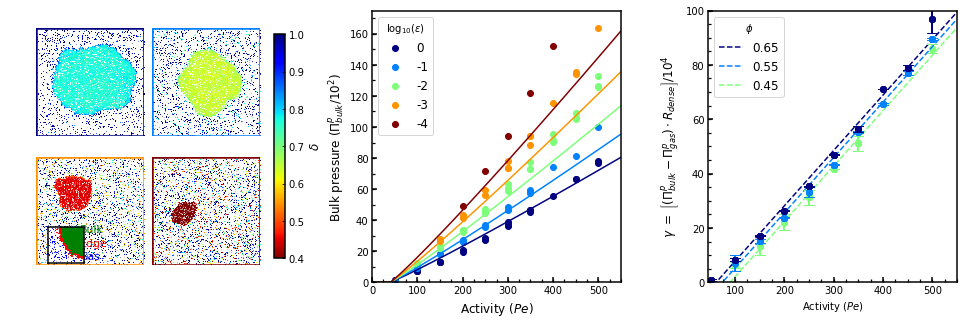

In [80]:
# Make a figure which includes: 
# -pressure (w/ analytical expression)
# -shrinking cluster images
# -surface tension
fsize=12

# Sort high to low
def doSort(inList):
    for i in range(0, len(inList)):
        for j in range(0, len(inList)):
            if inList[i] > inList[j] and i > j:
                inList[i], inList[j] = inList[j], inList[i]
    return inList

from PIL import Image
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches

imgs = []
im_ep = []
imPath = '/Users/kolbt/Desktop/soft_figures/shrinking_cluster'
imPath = '/Users/kolbt/Desktop/compiled/whingdingdilly/ipython/clusters_soft/edge_scatter'
imPath = '/Users/kolbt/Desktop/soft_figures/shrinking_cluster/spatial_heatmaps'
shrinkDir = os.listdir(imPath)
# Get images for plotting
# for i in shrinkDir:
#     if i[0:19] == 'cluster_pe300_phi65' and i[-4:] == '.png':
#         imgs.append(i)
#         im_ep.append(txtValue(i, 'eps'))
# for i in shrinkDir:
#     print(i[0:25])
#     if i[0:25] == 'cluster_pressure_pa300.0_' and i[-4:] == '.png':
#         imgs.append(i)
#         im_ep.append(txtValue(i, 'ep'))
for i in shrinkDir:
#     print(i[0:22])
    if i[0:22] == 'spatial_delta_cluster_' and i[-4:] == '.png':
        imgs.append(i)
        im_ep.append(txtValue(i, 'eps'))

# Sort images
doSort(im_ep) 
doSort(imgs)
# print(im_ep)
# Delete middle softness
del im_ep[2]
del imgs[2]
rect_col = list(np.copy(cols))
del rect_col[2]

ld_img = []
# Crop images
# for i in imgs:
#     im = Image.open(imPath + '/' + i)
#     width, height = im.size 
#     halfH = height / 2.
#     halfW = width / 2.
#     im1 = im.crop((halfW-halfH, 0, halfW+halfH, height)) 
#     ld_img.append(im1)
dim = 6600
for i in imgs:
    im = Image.open(imPath + '/' + i)
    # (left, upper, right, lower)
    # image is 9600 x 7200
    left = 700
    upper = 250
    im1 = im.crop((left, upper, left+dim, upper+dim)) 
    ld_img.append(im1)
    

# Width = 17.1cm
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
    
# Instantiate figure
# fig = plt.figure(figsize=cm2inch(18.2, 6.1))
fig = plt.figure(figsize=(16.5, 5))
# The parent gridspec
gs = gridspec.GridSpec(1, 3, figure=fig)

# Image gridspec
gs00 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[0], wspace=-0.15, hspace=-0.1,
                                        width_ratios=[5, 1])
gs0 = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=gs00[0], wspace=0.075, hspace=-0.1)
ax = []
# Image axes
ax.append(fig.add_subplot(gs0[0, 0]))
ax.append(fig.add_subplot(gs0[0, 1]))
ax.append(fig.add_subplot(gs0[1, 0]))
ax.append(fig.add_subplot(gs0[1, 1]))
# Colorbar axis
ax.append(fig.add_subplot(gs00[1]))

# The plot gridspec
ax.append(fig.add_subplot(gs[1]))
ax.append(fig.add_subplot(gs[2]))

# Plot the cropped images
for i in range(0, len(ld_img)):
    cur_im = ax[i].imshow(ld_img[i])
    ax[i].add_patch(patches.Rectangle((0, 0), 1, 1, linewidth=2.5, 
                                      edgecolor=rect_col[i], facecolor='none',
                                      transform=ax[i].transAxes))
    ax[i].set_axis_off()
    ax[i].set_aspect('equal')

cmap = mpl.cm.jet_r
norm = mpl.colors.Normalize(vmin=0.4, vmax=1.0)
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cb1 = fig.colorbar(sm, ax=ax[4], fraction=0.25, orientation='vertical')
cb1.set_label(r'$\delta$', fontsize=fsize)
ax[4].axis('off')

# cb1 = mpl.colorbar.ColorbarBase(ax[4], cmap=cmap,
#                                 norm=norm,
#                                 orientation='vertical',
#                                 fraction=.15)
# cb1.set_label(r'$\delta$', fontsize=fsize)

# left, bottom, width, height = 0.355, 0.18, 0.01, 0.65
# cbax = fig.add_axes([left, bottom, width, height])
# cmap = mpl.cm.jet
# norm = mpl.colors.Normalize(vmin=0.4, vmax=1.0)
# cb1 = mpl.colorbar.ColorbarBase(cbax, cmap=cmap,
#                                 norm=norm,
#                                 orientation='vertical')
# cb1.set_label(r'$\delta$', fontsize=fsize)
# cb1.ax.tick_params(labelsize=fsize)

# Add an inset to lower left image
left, bottom, width, height = 0.13, 0.18, 0.04, 0.1
# left, bottom, width, height = 0.175, 0.18, 0.05, 0.14
inset = fig.add_axes([left, bottom, width, height], transform=ax[2].transAxes)
inset.set_xticks([])
inset.set_yticks([])

# Plot text on image to indicate phases
ax[2].text(0.4, 0.3, 'Bulk',
        transform=ax[2].transAxes,
        color='green', fontsize=fsize-1)
ax[2].text(0.4, 0.175, 'Edge',
        transform=ax[2].transAxes,
        color='red', fontsize=fsize-1)
ax[2].text(0.4, 0.05, 'Gas',
        transform=ax[2].transAxes,
        color='blue', fontsize=fsize-1)

inPath = '/Users/kolbt/Desktop/compiled/whingdingdilly/ipython/clusters_soft/edge_scatter/'
inIm = 'cluster_pressure_pa300.0_pb0.0_xa100.0_phi65_ep0.001.png'
inset_im = Image.open(inPath + inIm)
# Image is 3702 x 3703
# (left, upper, right, lower)
# left = 750
# top = 1600
# dim = 800
left = 600
top = 1400
dim = 500
inset_cropped = inset_im.crop((left, top, left+dim, top+dim))
inset.imshow(inset_cropped)
    
# Plot the pressure
for i in range(0, len(distEps)):
    ax[5].plot(pes, np.divide(pLJ[i], 100.), c=cols[i], lw=1.5)
    for j in range(0, len(params)):
        if params['eps'][j] == distEps[i] and not all_pres[j].empty:
            ax[5].scatter(params['peA'][j], all_pres[j]['bulkPress']/100.,
                          c=cols[distEps.index(params['eps'][j])],
                          label="{0:.0f}".format(np.log10(params['eps'][j])))
ax[5].set_xlim(0., 550.)
ax[5].set_ylim(0., 175.)
ax[5].set_xlabel(r'Activity $(Pe)$', fontsize=fsize)
ax[5].set_ylabel(r'Bulk pressure $(\Pi^{p}_{bulk} / 10^{2})$', fontsize=fsize)

# Set the legend
handles, labels = ax[5].get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax[5].legend(by_label.values(), by_label.keys(), title=r'$\log_{10}(\epsilon)$', fontsize=fsize)

# Set the x and y minor ticks
loc = ticker.MultipleLocator(base=25.)
ax[5].xaxis.set_minor_locator(loc)
loc = ticker.MultipleLocator(base=10.)
ax[5].yaxis.set_minor_locator(loc)
# Tick width and height
ax[5].xaxis.set_tick_params(width=1.5, size=5.)
ax[5].yaxis.set_tick_params(width=1.5, size=5.)
ax[5].xaxis.set_tick_params(which='minor', width=1.25, size=3.)
ax[5].yaxis.set_tick_params(which='minor', width=1.25, size=3.)

# Plot the Surface tension
for i in range(0, len(distPhi)):
    ax[6].plot(peplot, forceLine(peplot, indb[i])/10000, c=cols[i], lw=1.5, ls='--', zorder=0, label="{0:.2f}".format(distPhi[i]/100.))

for i in range(0, len(distPe)):
    for j in range(0, len(distPhi)):
        for k in range(0, len(all_pres)):
            if params['peA'][k] == distPe[i]:
                if params['phi'][k] == distPhi[j]:
                    if ns[j][i] > 1:
                        ax[6].scatter(params['peA'][k],
                                    avg[j][i],
                                    c=cols[distPhi.index(params['phi'][k])],
                                   zorder=denses.index(params['phi'][k]))
                        ax[6].errorbar(params['peA'][k],
                                     avg[j][i],
                                     sd[j][i],
                                     capsize=5,
                                     c=cols[distPhi.index(params['phi'][k])],
                                     elinewidth=2.0,
                                     zorder=denses.index(params['phi'][k]))
ax[6].set_xlim(45, 550)
ax[6].set_ylim(0, 100)
ax[6].set_xlabel(r'Activity $(Pe)$')
ax[6].set_ylabel(r'$\gamma \ = \ \left[(\Pi^{p}_{bulk} - \Pi^{p}_{gas})\cdot R_{dense}\right]/10^{4}$', fontsize=fsize)

handles, labels = ax[6].get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax[6].legend(by_label.values(), by_label.keys(), title=r'$\phi$', fontsize=fsize)

# Set the x and y minor ticks
loc = ticker.MultipleLocator(base=25.)
ax[6].xaxis.set_minor_locator(loc)
loc = ticker.MultipleLocator(base=5.)
ax[6].yaxis.set_minor_locator(loc)
# Tick width and height
ax[6].xaxis.set_tick_params(width=1.5, size=5.)
ax[6].yaxis.set_tick_params(width=1.5, size=5.)
ax[6].xaxis.set_tick_params(which='minor', width=1.25, size=3.)
ax[6].yaxis.set_tick_params(which='minor', width=1.25, size=3.)

gs.update(wspace=0.35)

plt.savefig('shrinking_fig.pdf', bbox_inches='tight', pad_inches=0.01, dpi=1000)
plt.show()